# IMDB Web-spider
    
    In this project we will make a web-spider of imbd.com website.  
    The idea is the following: we want to find distances between different actors according to their common films.  
    If actors didn't have common films, we will search for closest film through all actors. It means that we will 
    iterate through all actors from all films of each actor and go deeper until we find the second actor.

### Importing libraries

    First, we install and import all the necessary modules.  

In [1]:
import requests
import urllib
import json
from bs4 import BeautifulSoup
import re
import time
import random
import math
import asyncio
import pandas as pd
import copy
import pickle

### 1. Functions to get movies by actor

    First, let's write a function to get all movies from one actor.
    For this, we will connect the imdb.com website using requests:

### 1.1. Helpers functions

In [130]:
# Connecting to actor/actress page to get movies later

def page_request(url):

    cookies = {
        'session-id': '131-3970232-4528266',
        'session-id-time': '2082787201l',
        'ad-oo': '0',
        'ubid-main': '130-7570058-2555758',
        # uu=eyJpZCI6InV1ZjI2NTZjMmM5ZTdkNDNiN2JiZmQiLCJwcmVmZXJlbmNlcyI6eyJmaW5kX2luY2x1ZGVfYWR1bHQiOmZhbHNlfX0=; 
        'ci': 'eyJhY3QiOiJDUDVtOUFBUDVtOUFBRjRBQkNFTmZyLWdBQUFBQUFBQUFCYW1HNndCMkdvc05UNGF0aHJERFh1R3dZYkR3MlREWmVHMFlicUFBRUFBQUFBIiwiZ2N0IjoiQ1A1bTlBQVA1bTlBQUY0QUJDRU5BYkVnQU5MZ0FBQUFBQmFnSG1RUGdBRkFBTkFBeUFCd0FFRUFKQUFsQUJPQUNvQUZvQU1vQWFBQnFBRDBBSVVBUkFCR2dDWUFKd0FVQUFwQUJVQUM3QUdFQVlnQXpBQnVnRGtBT1lBZmdCQUFDRUFFUkFJNEFqd0JOQUNsQUZhQUxnQWFvQThRQi1nRVJBSXRBUndCSFFDVEFFdEFKd0FVMEFySUJYZ0RBZ0dLQU02QWNJQTRnQjFBRDlBSDhBUkFBalVCSG9DalFGaGdMekFYdUF3UUJsZ0R6QUFBZ0FBRkFvQU1BQVFmUUNRQVlBQWctZ09nQXdBQkI5QWxBQmdBQ0Q2QlNBREFBRUgwQXdBR0FBSVBvQ2dBTUFBUWZRR0FBWUFBZy1nUUFBd0FCQjlBUUFQQUJBQUNRQUZRQU5ZQXdnREVBR1lBT1lBZ0FCU2dEVkFKYUFWa0Fyd0J3Z0ZoZ0EuY0FBQUFBQUFBQUEiLCJwdXJwb3NlcyI6WyIxIiwiMiIsIjQiXSwidmVuZG9ycyI6WyI2OCIsIjc3IiwiNzU1IiwiNzkzIiwiODA0IiwiMTEyNiIsIjUwMDI1IiwiNTAwMzAiXX0',
        #'session-token': 'WBSJZBiEJZ1BcecC2H7oYzYBWCee18CNqZ6hc5rJcyjnUNSvK8UKBF9evKizoUh81gkxB4yogOaFxSq7hMSnXYnOfbLEG1gKVS+MGIhQj/5lGqnIIgevVrymn3Hf4YkasXPG4/PyW1Ao25kkl5gO3lMYUZjBLCsvISMlUyMOv7jkv03DX6et0waYy9idLYSdDqXJQ7dP+gZO/vAoN+vTXWvQFjvkpN3ueFE9JdQlTQA9+OmMeMLDxBkXTxySJ/wdocspZex/EQFLq3MqtniFSIJEt/SIoUlD2MODs4MA2aqiFR4OW6zB8c7tD1DVs/1emfRXXvz3BSwyK8k5+oeymiKXppVUTjO0',
        'csm-hit': 'tb:S4QAW97NFC53GR89SREF+s-Q2N4495SK95JBB2GG3C3|1707312445771&t:1707312445771&adb:adblk_yes'
    }


    headers = {
        'authority': 'caching.graphql.imdb.com',
        'accept': 'application/graphql+json, application/json',
        'accept-language': 'en-US',
        'content-type': 'application/json',
        'cookie': 'session-id-time=2082787201l; session-id=145-0011666-6816859; ubid-main=132-6707387-1844815; uu=eyJpZCI6InV1ZWEzNzBhOTE3ZWEwNGQyOWI5NjkiLCJwcmVmZXJlbmNlcyI6eyJmaW5kX2luY2x1ZGVfYWR1bHQiOmZhbHNlfX0=; ad-oo=0; ci=e30; session-token=mdrSLqcefI1z7d//krR9p4VC0X48vmh7jv7x2uL+sbQzuocJQywmkVaJfYLqZCO55a4YNvzCumk5hLBMzmuMJhN/0zPj0e26LvC1xiRLkcaYQOSi1cxkTyTuUKgD8PsCSsy2P5st1RMfWG5MqkU7rBtw6rOSlPc8tWJgwVv1BqjsyqO77NW6KPjw4BpQ3MNFpa2lg9YMwKKGl+ljOUQHa42Tg9aoAZHB1p559rwdAsgkDiffEa0uU/283+BBDcpqwiaQiuCNt26CiTB4b9KNanATvz0jTZ83HfIV97AvaNy0pOxHb+c/0dDK2F5047QEIFCjynKbIYtMYHckc7q3DboEfKxUIrOC',
        'origin': 'https://www.imdb.com',
        'referer': 'https://www.imdb.com/',
        'sec-ch-ua': '"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'same-site',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
        'x-amzn-sessionid': '145-0011666-6816859',
        'x-imdb-client-name': 'imdb-web-next',
        'x-imdb-client-rid': 'HX342HMY7ACM8KACJK85',
        'x-imdb-user-country': 'EN',
        'x-imdb-user-language': 'en-US',
        'x-imdb-weblab-treatment-overrides': '{"IMDB_DESKTOP_SEARCH_ALGORITHM_UPDATES_577300":"T1","IMDB_NAV_PRO_FLY_OUT_Q1_REFRESH_848923":"T2"}',
    }

    params = {
        'variables': '{"locale":"en-US"}',
    }

    response = requests.get(
        url=url,
        cookies=cookies,
        headers=headers,
        params=params
    )
    
    return response

    Now we can get the tree and iterate through it to find necessary tags.

In [131]:
# We get an HTML-tree of our page to use further

def get_actor_tree(response):
    
    # Making a tree from response
    tree = BeautifulSoup(response.text)
    
    # And then extract the needed part
    page = tree.find_all('div', {'class': ["filmo-row odd", "filmo-row even"]})
    
    return page

In [132]:
# Function to get movie and its link

def get_movie_and_link(page, i):
    
    imdb_url = 'imdb.com'
    name = page[i].find('a').next
    href = page[i].find('a').attrs['href']
    title = re.sub(r'\?.*', '', href)
    link = imdb_url + title
    
    return name, link

In [133]:
# Function to get all movies

def get_list_of_movies(page, i):
    
    if 'actor' in page[i].attrs['id'] or 'actress' in page[i].attrs['id']:
        if page[i].find('a').next.next == '\n':
            if 'uncredited' not in page[i].text:
                name, link = get_movie_and_link(page, i)
                return (name, link)
            
    return None

### 1.2. Main function   ***get_movies_by_actor_soup()***

    Combining all helpers to make a final function for searching movies.

In [134]:
def get_movies_by_actor_soup(actor_information, num_of_movies_limit=-1):
        
    actor_information = actor_information.split()
    gender = actor_information[0]
    actor_name = actor_information[1] + ' ' + actor_information[2]
    url = actor_information[-1]  + 'fullcredits/'
    
    response = page_request(url)
    page = get_actor_tree(response)
    
    list_of_movies = []
    n = len(page)
    
    if num_of_movies_limit == -1 or num_of_movies_limit > n:
        for i in range(n):
            movie = get_list_of_movies(page, i)
            if movie is not None:
                list_of_movies.append(movie)
    else:
        for i in range(n):
            if num_of_movies_limit > 0:
                movie = get_list_of_movies(page, i)
                if movie is not None:
                    list_of_movies.append(movie)
                    num_of_movies_limit -= 1
    
    return list_of_movies

### 1.3. Testing

In [117]:
print('----------------------------------------')
print('actor Dwayne Johnson', ' no limit')
print('----------------------------------------')
print(get_movies_by_actor_soup('actor Dwayne Johnson https://www.imdb.com/name/nm0425005/'))
time.sleep(random.choice((2, 3, 1)))
print('----------------------------------------')
print('actor Dwayne Johnson', ' limit=100')
print('----------------------------------------')
print(get_movies_by_actor_soup('actor Dwayne Johnson https://www.imdb.com/name/nm0425005/', num_of_movies_limit=100))
time.sleep(random.choice((2, 3, 1)))
print('----------------------------------------')
print('actor Dwayne Johnson', ' limit=5')
print('----------------------------------------')
print(get_movies_by_actor_soup('actor Dwayne Johnson https://www.imdb.com/name/nm0425005/', num_of_movies_limit=5))
time.sleep(random.choice((2, 3, 1)))
print('----------------------------------------')
print('actress Scarlett Johansson', ' no limit')
print('----------------------------------------')
print(get_movies_by_actor_soup('actress Scarlett Johansson https://www.imdb.com/name/nm0424060/'))
time.sleep(random.choice((2, 3, 1)))
print('----------------------------------------')
print('actress Scarlett Johansson', ' limit=100')
print('----------------------------------------')
print(get_movies_by_actor_soup('actress Scarlett Johansson https://www.imdb.com/name/nm0424060/', num_of_movies_limit=100))
time.sleep(random.choice((2, 3, 1)))
print('----------------------------------------')
print('actress Scarlett Johansson', ' limit=5')
print('----------------------------------------')
print(get_movies_by_actor_soup('actress Scarlett Johansson https://www.imdb.com/name/nm0424060/', num_of_movies_limit=5))
time.sleep(random.choice((2, 3, 1)))

----------------------------------------
actor Dwayne Johnson  no limit
----------------------------------------
[('Black Adam', 'imdb.com/title/tt6443346/'), ('DC League of Super-Pets', 'imdb.com/title/tt8912936/'), ('Red Notice', 'imdb.com/title/tt7991608/'), ('Free Guy', 'imdb.com/title/tt6264654/'), ('Jungle Cruise', 'imdb.com/title/tt0870154/'), ('Jumanji: The Next Level', 'imdb.com/title/tt7975244/'), ('Fast & Furious Presents: Hobbs & Shaw', 'imdb.com/title/tt6806448/'), ('Fighting with My Family', 'imdb.com/title/tt6513120/'), ('Skyscraper', 'imdb.com/title/tt5758778/'), ('Rampage', 'imdb.com/title/tt2231461/'), ('Jumanji: Welcome to the Jungle', 'imdb.com/title/tt2283362/'), ('Baywatch', 'imdb.com/title/tt1469304/'), ('The Fate of the Furious', 'imdb.com/title/tt4630562/'), ('Moana', 'imdb.com/title/tt3521164/'), ('Central Intelligence', 'imdb.com/title/tt1489889/'), ('Jem and the Holograms', 'imdb.com/title/tt3614530/'), ('San Andreas', 'imdb.com/title/tt2126355/'), ('Furious

----------------------------------------
actress Scarlett Johansson  limit=5
----------------------------------------
[('North Star', 'imdb.com/title/tt20911974/'), ('Asteroid City', 'imdb.com/title/tt14230388/'), ('Sing 2', 'imdb.com/title/tt6467266/'), ('Black Widow', 'imdb.com/title/tt3480822/'), ('Jojo Rabbit', 'imdb.com/title/tt2584384/')]


### 2. Functions to get actors by movie

    Now, to be able to go deeper, we need to make a similar function, but now to search for all actors in a movie.
    Let's write this function.

### 2.1 Helper functions

In [135]:
def get_cast_list(page, movie_name, num_of_movies_limit):
    
    n = len(page)
    imdb_url = 'https://www.imdb.com'
    list_of_actors = []
    
    # Again we check the value of our limit

    if num_of_movies_limit == None or num_of_movies_limit > n:
        for i in range(n):

            # We also exclude archive footage from records

            if '(archive footage)' in page[i].find('td', {'class' : 'character'}).text:
                continue

            else:

                # Get actor's name

                name = page[i].td.next_sibling.next_sibling.text.strip()

                # And link to actor's page

                href = page[i].td.next_sibling.next_sibling.a.attrs['href']
                title = re.sub(r'\?.*', '', href)
                link = imdb_url + title + 'fullcredits/'

                # We save to the list tuples of movies and links

                list_of_actors.append((name, link))

    # And do the same but using limit if it satisfies the condition

    else:
        for i in range(num_of_movies_limit):      
            if '(archive footage)' in page[i].find('td', {'class' : 'character'}).text:
                continue
            else:
                name = page[i].td.next_sibling.next_sibling.text.strip()
                href = page[i].td.next_sibling.next_sibling.a.attrs['href']
                title = re.sub(r'\?.*', '', href)
                link = imdb_url + title + 'fullcredits/'
                list_of_actors.append((name, link))

    return list_of_actors

In [136]:
def get_movie_tree(response):
    
    # Making a tree from response
    tree = BeautifulSoup(response.text)
    
    page = tree.find_all('tr', {'class' : ['odd', 'even']})
    
    return page

### 2.2. Main function ***get_actors_by_movie_soup***

In [137]:
def get_actors_by_movie_soup(movie_information, num_of_movies_limit=None):
    
    # First, we split argument values to several ones
    
    movie_splitted = movie_information.split()
    movie_name = re.findall(r'"(.*?)"', movie_information)[0]
    url = movie_splitted[-1]
    
    response = page_request(url)
    page = get_movie_tree(response)
    
    return get_cast_list(page, movie_name, num_of_movies_limit)

### 2.3. Testing

In [118]:
print('----------------------------------------')
print('movie "Black Widow"', ' no limit')
print('----------------------------------------')
print(get_actors_by_movie_soup('movie "Black Widow" https://www.imdb.com/title/tt3480822/fullcredits/'))
time.sleep(random.choice((2, 3, 1)))
print('----------------------------------------')
print('movie "Black Widow"',' limit 100')
print('----------------------------------------')
print(get_actors_by_movie_soup('movie "Black Widow" https://www.imdb.com/title/tt3480822/fullcredits/', num_of_movies_limit=150))
time.sleep(random.choice((2, 3, 1)))
print('----------------------------------------')
print('movie "Black Widow"',' limit 5')
print('----------------------------------------')
print(get_actors_by_movie_soup('movie "Black Widow" https://www.imdb.com/title/tt3480822/fullcredits/', num_of_movies_limit=5))
time.sleep(random.choice((2, 3, 1)))

----------------------------------------
movie "Black Widow"  no limit
----------------------------------------
[('Scarlett Johansson', 'https://www.imdb.com/name/nm0424060/fullcredits/'), ('Florence Pugh', 'https://www.imdb.com/name/nm6073955/fullcredits/'), ('Rachel Weisz', 'https://www.imdb.com/name/nm0001838/fullcredits/'), ('David Harbour', 'https://www.imdb.com/name/nm1092086/fullcredits/'), ('Ray Winstone', 'https://www.imdb.com/name/nm0935653/fullcredits/'), ('Ever Anderson', 'https://www.imdb.com/name/nm8349839/fullcredits/'), ('Violet McGraw', 'https://www.imdb.com/name/nm8627157/fullcredits/'), ('O-T Fagbenle', 'https://www.imdb.com/name/nm1282966/fullcredits/'), ('William Hurt', 'https://www.imdb.com/name/nm0000458/fullcredits/'), ('Olga Kurylenko', 'https://www.imdb.com/name/nm1385871/fullcredits/'), ('Ryan Kiera Armstrong', 'https://www.imdb.com/name/nm8740834/fullcredits/'), ('Liani Samuel', 'https://www.imdb.com/name/nm9384191/fullcredits/'), ('Michelle Lee', 'https://w

----------------------------------------
movie "Black Widow"  limit 5
----------------------------------------
[('Scarlett Johansson', 'https://www.imdb.com/name/nm0424060/fullcredits/'), ('Florence Pugh', 'https://www.imdb.com/name/nm6073955/fullcredits/'), ('Rachel Weisz', 'https://www.imdb.com/name/nm0001838/fullcredits/'), ('David Harbour', 'https://www.imdb.com/name/nm1092086/fullcredits/'), ('Ray Winstone', 'https://www.imdb.com/name/nm0935653/fullcredits/')]


### 3. Measuring movie distance

    Finally, we will create a final function to measure the obtained distances between actors.

### 3.1 Hepler functions

In [138]:
# Global variables to seen actors

def get_seen_actors():
    
    # Define global variable 
    global seen_actors
    
    # Check if it already exist
    # And create if it's not
    try:
        seen_actors
        if seen_actors is None:
            seen_actors = dict()
    except:
        seen_actors = dict()
        
    return seen_actors

In [139]:
# Global variables to seen movies
# The same concept as above

def get_seen_movies():
    
    global seen_movies
    
    try:
        seen_movies
        if seen_movies is None:
            seen_movies = dict()
    except:
        seen_movies = dict()
        
    return seen_movies

In [140]:
# Global variables for distances
# The same concept as above

def get_distances():
    
    global total_distances
    
    try:
        total_distances
        if total_distances is None:
            total_distances = []
    except:
        total_distances = []
        
    return total_distances

In [141]:
# Searching movies where particular actor played

def movies_search(actor_url, num_of_movies_limit):
    
    # Convert URL, get response and get HTML-tree
    actor_name, response, actor_url = url_actor_converter(actor_url)
    page = get_actor_tree(response)

    list_of_movies = []
    n = len(page)
    
    # Then get list of movies by adding each movie
    # Also check if the limit was passed as an argument
    if num_of_movies_limit == None or num_of_movies_limit > n:
        for i in range(n):
            movie = get_list_of_movies(page, i)
            if movie is not None:
                list_of_movies.append(movie)
    else:
        for i in range(n):
            if num_of_movies_limit > 0:
                movie = get_list_of_movies(page, i)
                if movie is not None:
                    list_of_movies.append(movie)
                    num_of_movies_limit -= 1
    
    return list_of_movies, actor_name

In [142]:
# Function to search actors of a particular movie

def actors_search(movie_name, movie_url, num_of_actors_limit):
    
    # Converting URL and getting the variables
    movie_name, movie_url, movie_information = url_movie_converter(movie_name, movie_url)
    
    # Then search in the HTML-tree
    response = page_request(movie_url)
    tree = BeautifulSoup(response.text)
    page = tree.find_all('tr', {'class' : ['odd', 'even']})
    list_of_actors = get_cast_list(page, movie_name, num_of_actors_limit)
    
    return list_of_actors, movie_name

In [143]:
# Function to convert any actor URL to a common type

def url_actor_converter(actor_url):
    
    if actor_url[0] == 'i':
        actor_url = 'www.' + actor_url
        actor_url = 'https://' + actor_url
    elif actor_url[0] == 'w':
        actor_url = 'https://' + actor_url
    if actor_url[-1] != '/':
        actor_url = actor_url + '/'
    if 'fullcredits/' not in actor_url:
        actor_url = actor_url + 'fullcredits/'
    response = page_request(actor_url)
    tree = BeautifulSoup(response.text)
    
    splitted_text = tree.find('title').text.split(' ')
    name = splitted_text[0] + ' ' + splitted_text[1]
    
    return name, response, actor_url

In [144]:
# Function to convert any movie URL to a common type

def url_movie_converter(movie_name, url):
    
    movie_name = '"' + movie_name + '"'
    
    if url[0] == 'i':
        url = 'www.' + url
        url = 'https://' + url
    elif url[0] == 'w':
        url = 'https://' + url
    if url[-1] != '/':
        url = url + '/'
    if 'fullcredits/' not in url:
        url = url + 'fullcredits/'
        
    movie_information = 'movie ' + movie_name + ' ' + url

    return movie_name, url, movie_information

### 3.2. Main function

    And create the final main function.

In [145]:
# Function to get all distances

def get_movie_distance(actor_start_url, actor_end_url, num_of_actors_limit=None, num_of_movies_limit=None):
    
    current_distance = 1
    
    # Setting global variables of cache
    
    global seen_actors
    global seen_movies
    global total_distances
    
    seen_actors = get_seen_actors()
    seen_movies = get_seen_movies()
    total_distances = get_distances()
    
    # Getting actors data
    actor_1_movies, actor_1_name = movies_search(actor_start_url, num_of_movies_limit)
    actor_2_movies, actor_2_name = movies_search(actor_end_url, num_of_movies_limit)      
    
    print('------------------------------------------')
    print(f'[New actors] {actor_1_name} & {actor_2_name} distance searching:')
    print('------------------------------------------')
    
    # Check if they are already presented in distances
    for i in range(len(total_distances)):
        if (total_distances[i][1] == actor_1_name and total_distances[i][0] == actor_2_name):
            total_distances.append([actor_1_name, actor_2_name, total_distances[i][-1]])
            print(f'[Cached] Similar distance was already found on level {total_distances[i][-1]}')
            return total_distances[i][-1]
        elif (total_distances[i][0] == actor_1_name and total_distances[i][1] == actor_2_name):
            print(f'[Skipped] Iteration was skipped because distance was already writted (level {total_distances[i][-1]})')
            return total_distances[i][-1]
    
    seen_actors[actor_1_name] = actor_1_movies
    seen_actors[actor_2_name] = actor_2_movies
    
    # Check if level 1 connection exist
    common_films = (set(actor_1_movies) & set(actor_2_movies))
    if common_films:
        print(f'[Match] Found match on distance level {current_distance}')
        print(f'[Film] Films where distance was found: {common_films}')
        total_distances.append([actor_1_name, actor_2_name, current_distance])
        return current_distance
    
    # If not, go deeper
    else:
        print('------------------------------------------')
        print(f':-\ [No match] No match on distance level {current_distance}')
        current_distance += 1
        print(f'[Going deeper] Checking distance level {current_distance}')
        print('------------------------------------------')
        
        # Defining variables to store data
        movies_to_check = []
        actors_list = []
        movies_to_check += actor_1_movies
        
        # We will iterate untill distance < 10 to avoid infinite loop
        while current_distance < 10:
            for m in movies_to_check:
                (movie_name, movie_url) = m
                if movie_name in seen_movies:
                    actors_list += seen_movies[movie_name]
                    print(f'[A] (*)_(*) actors from {movie_name} was already seen')
                else:
                    list_of_actors, movie = actors_search(movie_name, movie_url, num_of_actors_limit)
                    seen_movies[movie_name] = list_of_actors
                    actors_list += list_of_actors
                    print(f'[A]...extracting actors for movie [{movie_name}]')
                    
            movies_to_check = []
            for a in actors_list:
                (actor_name, actor_url) = a
                if actor_name in seen_actors:
                    list_of_movies = seen_actors[actor_name]
                    movies_to_check += seen_actors[actor_name]
                    print(f'[M] (*)_(*) movies from {actor_name} was already seen')
                else:
                    list_of_movies, actor_name = movies_search(actor_url, num_of_movies_limit)
                    seen_actors[actor_name] = list_of_movies
                    movies_to_check += list_of_movies
                    print(f'[M]...extracting movies for actor [{actor_name}]')
                
                common_films = (set(list_of_movies) & set(actor_2_movies))
                if common_films:
                    print(f'[Match] Found match on distance level {current_distance}')
                    print(f'[Film] Films where distance was found: {common_films}')
                    total_distances.append([actor_1_name, actor_2_name, current_distance])
                    return current_distance
            
            actors_list = []
            print('------------------------------------------')
            print(f':-\ [No match] on distance level {current_distance}')
            current_distance += 1
            print(f'[Going deeper] checking distance level {current_distance}')
            print('------------------------------------------')
    
    # If we didn't find connection, then return infinity after level 10
    return math.inf

### 3.3. Testing

In [46]:
%%time 

actors = [
    'Dwayne Johnson',
    'Chris Hemsworth',
    'Robert Downey Jr.',
    'Akshay Kumar',
    'Jackie Chan',
    'Bradley Cooper',
    'Adam Sandler',
    'Scarlett Johansson',
    'Sofia Vergara',
    'Chris Evans'
]

urls = [
    'nm0425005',
    'nm1165110',
    'nm0000375',
    'nm0474774',
    'nm0000329',
    'nm0177896',
    'nm0001191',
    'nm0424060',
    'nm0005527',
    'nm0262635'
]

base_url = 'imdb.com/name/'

for i in urls:
    url1 = base_url + i
    for j in urls:
        url2 = base_url + j
        if i != j:
            get_movie_distance(url1, url2, num_of_actors_limit=None, num_of_movies_limit=None)

------------------------------------------
[New actors] Dwayne Johnson & Chris Hemsworth distance searching:
------------------------------------------
------------------------------------------
:-\ [No match] No match on distance level 1
[Going deeper] Checking distance level 2
------------------------------------------
[A] (*)_(*) actors from Black Adam was already seen
[A] (*)_(*) actors from DC League of Super-Pets was already seen
[A] (*)_(*) actors from Red Notice was already seen
[A] (*)_(*) actors from Free Guy was already seen
[A] (*)_(*) actors from Jungle Cruise was already seen
[A] (*)_(*) actors from Jumanji: The Next Level was already seen
[A] (*)_(*) actors from Fast & Furious Presents: Hobbs & Shaw was already seen
[A] (*)_(*) actors from Fighting with My Family was already seen
[A] (*)_(*) actors from Skyscraper was already seen
[A] (*)_(*) actors from Rampage was already seen
[A] (*)_(*) actors from Jumanji: Welcome to the Jungle was already seen
[A] (*)_(*) actors fr

[M]...extracting movies for actor [A. Manuel]
[M] (*)_(*) movies from Djimon Hounsou was already seen
[M] (*)_(*) movies from Raj Kala was already seen
[M]...extracting movies for actor [E. Lloyd]
[M] (*)_(*) movies from Kiara Rashawn was already seen
[M] (*)_(*) movies from Onye Eme-Akwari was already seen
[M] (*)_(*) movies from Sanna Erica was already seen
[M] (*)_(*) movies from Vince Canlas was already seen
[M] (*)_(*) movies from Tonea Stewart was already seen
[M] (*)_(*) movies from Meghna Nagarajan was already seen
[M] (*)_(*) movies from Patrick Sabongui was already seen
[M] (*)_(*) movies from Alex Parkinson was already seen
[M] (*)_(*) movies from Joseph Gatt was already seen
[M] (*)_(*) movies from Kamen Casey was already seen
[M] (*)_(*) movies from Dennis Dawson was already seen
[M] (*)_(*) movies from Mike Senior was already seen
[M] (*)_(*) movies from Jermaine Rivers was already seen
[M]...extracting movies for actor [Regina Ting]
[M] (*)_(*) movies from Sekou Laidlow 

[M]...extracting movies for actor [Christopher Matthew]
[M] (*)_(*) movies from Natacha Ellie was already seen
[M] (*)_(*) movies from Daniel Danca was already seen
[M] (*)_(*) movies from Yssamei Panganiban was already seen
[M] (*)_(*) movies from Ben Jenkin was already seen
[M] (*)_(*) movies from Natalie Burn was already seen
[M] (*)_(*) movies from Henry Cavill was already seen
[M] (*)_(*) movies from Viola Davis was already seen
[M]...extracting movies for actor [Jace A.]
[M] (*)_(*) movies from Reyna Janelle was already seen
[M] (*)_(*) movies from Akam Khiziryan was already seen
[M] (*)_(*) movies from Christin Kingery was already seen
[M] (*)_(*) movies from C.J. Maxwell was already seen
[M] (*)_(*) movies from Peter Nguyen was already seen
[M] (*)_(*) movies from Rahiem Riley was already seen
[M]...extracting movies for actor [Vanessa Vega]
[M] (*)_(*) movies from Tre Ryan was already seen
[M] (*)_(*) movies from Mark Sadek was already seen
[M] (*)_(*) movies from D.J. Stavrop

------------------------------------------
[New actors] Dwayne Johnson & Adam Sandler distance searching:
------------------------------------------
------------------------------------------
:-\ [No match] No match on distance level 1
[Going deeper] Checking distance level 2
------------------------------------------
[A] (*)_(*) actors from Black Adam was already seen
[A] (*)_(*) actors from DC League of Super-Pets was already seen
[A] (*)_(*) actors from Red Notice was already seen
[A] (*)_(*) actors from Free Guy was already seen
[A] (*)_(*) actors from Jungle Cruise was already seen
[A] (*)_(*) actors from Jumanji: The Next Level was already seen
[A] (*)_(*) actors from Fast & Furious Presents: Hobbs & Shaw was already seen
[A] (*)_(*) actors from Fighting with My Family was already seen
[A] (*)_(*) actors from Skyscraper was already seen
[A] (*)_(*) actors from Rampage was already seen
[A] (*)_(*) actors from Jumanji: Welcome to the Jungle was already seen
[A] (*)_(*) actors from 

[M]...extracting movies for actor [A. Manuel]
[M] (*)_(*) movies from Djimon Hounsou was already seen
[M] (*)_(*) movies from Raj Kala was already seen
[M]...extracting movies for actor [E. Lloyd]
[M] (*)_(*) movies from Kiara Rashawn was already seen
[M] (*)_(*) movies from Onye Eme-Akwari was already seen
[M] (*)_(*) movies from Sanna Erica was already seen
[M] (*)_(*) movies from Vince Canlas was already seen
[Match] Found match on distance level 2
[Film] Films where distance was found: {('The Three Stooges', 'imdb.com/title/tt0383010/')}
------------------------------------------
[New actors] Dwayne Johnson & Chris Evans distance searching:
------------------------------------------
[Match] Found match on distance level 1
[Film] Films where distance was found: {('Free Guy', 'imdb.com/title/tt6264654/')}
------------------------------------------
[New actors] Chris Hemsworth & Dwayne Johnson distance searching:
------------------------------------------
[Cached] Similar distance was

[M]...extracting movies for actor [Steven A.]
[M]...extracting movies for actor [Jordan Le]
[M] (*)_(*) movies from Luke Davis was already seen
[M] (*)_(*) movies from Beka Kovziashvili was already seen
[M] (*)_(*) movies from Olexandr Kopytko was already seen
[M] (*)_(*) movies from Jaba Gegeshidze was already seen
[M] (*)_(*) movies from Sam Hargrave was already seen
[M] (*)_(*) movies from Idris Elba was already seen
[M] (*)_(*) movies from Olga Kurylenko was already seen
[M] (*)_(*) movies from Filip Finkelstejn was already seen
[M] (*)_(*) movies from Armen Greyg was already seen
[M] (*)_(*) movies from Ersan Ilhan was already seen
[M] (*)_(*) movies from Alex Montyro was already seen
[M] (*)_(*) movies from Sinead Phelps was already seen
[M] (*)_(*) movies from Sebastien Sisak was already seen
[M]...extracting movies for actor [Anouar H.]
[M]...extracting movies for actor [Anthony J.]
[M] (*)_(*) movies from Chris Hemsworth was already seen
[M] (*)_(*) movies from Natalie Portman

[M]...extracting movies for actor [Steven A.]
[M]...extracting movies for actor [Jordan Le]
[M] (*)_(*) movies from Luke Davis was already seen
[M] (*)_(*) movies from Beka Kovziashvili was already seen
[M] (*)_(*) movies from Olexandr Kopytko was already seen
[M] (*)_(*) movies from Jaba Gegeshidze was already seen
[M] (*)_(*) movies from Sam Hargrave was already seen
[M] (*)_(*) movies from Idris Elba was already seen
[M] (*)_(*) movies from Olga Kurylenko was already seen
[M] (*)_(*) movies from Filip Finkelstejn was already seen
[M] (*)_(*) movies from Armen Greyg was already seen
[M] (*)_(*) movies from Ersan Ilhan was already seen
[M] (*)_(*) movies from Alex Montyro was already seen
[M] (*)_(*) movies from Sinead Phelps was already seen
[Match] Found match on distance level 2
[Film] Films where distance was found: {('Spaceman', 'imdb.com/title/tt11097384/')}
------------------------------------------
[New actors] Chris Hemsworth & Scarlett Johansson distance searching:
---------

------------------------------------------
[New actors] Chris Hemsworth & Chris Evans distance searching:
------------------------------------------
[Match] Found match on distance level 1
[Film] Films where distance was found: {('Avengers: Age of Ultron', 'imdb.com/title/tt2395427/'), ('The Avengers', 'imdb.com/title/tt0848228/'), ('Avengers: Endgame', 'imdb.com/title/tt4154796/'), ('Avengers: Infinity War', 'imdb.com/title/tt4154756/')}
------------------------------------------
[New actors] Robert Downey & Dwayne Johnson distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 2
------------------------------------------
[New actors] Robert Downey & Chris Hemsworth distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 1
------------------------------------------
[New actors] Robert Downey & Akshay Kumar distance searching:
-----------------------------------------

[M]...extracting movies for actor [Jeremy John]
[M] (*)_(*) movies from Sean Avery was already seen
[M] (*)_(*) movies from Adam Kroeger was already seen
[M] (*)_(*) movies from Drew Kenney was already seen
[M] (*)_(*) movies from Bryce Johnson was already seen
[M] (*)_(*) movies from Flora Nolan was already seen
[M] (*)_(*) movies from Kerry Westcott was already seen
[M] (*)_(*) movies from Christina Hogue was already seen
[M] (*)_(*) movies from Clay Bunker was already seen
[M] (*)_(*) movies from Tyler Beardsley was already seen
[M]...extracting movies for actor [Maria Teresa]
[M] (*)_(*) movies from Kate French was already seen
[M] (*)_(*) movies from Gary Oldman was already seen
[M] (*)_(*) movies from Hap Lawrence was already seen
[M]...extracting movies for actor [Allan Wayne]
[M] (*)_(*) movies from Hunter Avant was already seen
[M] (*)_(*) movies from Aevrey Balin was already seen
[M] (*)_(*) movies from Kevin Berndt was already seen
[M] (*)_(*) movies from David Bertucci was 

[M]...extracting movies for actor [Anouar H.]
[M]...extracting movies for actor [Neil Alexander]
[M] (*)_(*) movies from Clem So was already seen
[M] (*)_(*) movies from Charlotte Summers was already seen
[M] (*)_(*) movies from Georgie-May Tearle was already seen
[M] (*)_(*) movies from Frank Todaro was already seen
[M] (*)_(*) movies from Joshua Tomkins was already seen
[M] (*)_(*) movies from Michaela Trew was already seen
[M]...extracting movies for actor [Robert Downey]
[M] (*)_(*) movies from Chris Evans was already seen
[M] (*)_(*) movies from Mark Ruffalo was already seen
[M] (*)_(*) movies from Chris Hemsworth was already seen
[M] (*)_(*) movies from Scarlett Johansson was already seen
[M] (*)_(*) movies from Jeremy Renner was already seen
[M] (*)_(*) movies from Don Cheadle was already seen
[M] (*)_(*) movies from Paul Rudd was already seen
[M] (*)_(*) movies from Benedict Cumberbatch was already seen
[M] (*)_(*) movies from Chadwick Boseman was already seen
[M] (*)_(*) movie

[M]...extracting movies for actor [Daniel L.]
[M] (*)_(*) movies from Keith Nussbaum was already seen
[M] (*)_(*) movies from Audrae Peterson was already seen
[M] (*)_(*) movies from Paul Pillsbury was already seen
[M] (*)_(*) movies from Dustin Pitan was already seen
[M]...extracting movies for actor [Ryan L.]
[M] (*)_(*) movies from Rob Romero was already seen
[M] (*)_(*) movies from Kevin So was already seen
[M]...extracting movies for actor [James Robert]
[M] (*)_(*) movies from Kris Taylor was already seen
[M] (*)_(*) movies from Greg Tiffan was already seen
[M] (*)_(*) movies from Robert Tinsley was already seen
[M] (*)_(*) movies from Eric Wallace was already seen
[M] (*)_(*) movies from Keith Wallace was already seen
[M] (*)_(*) movies from Benjamin Weaver was already seen
[M] (*)_(*) movies from Miles Webb was already seen
[M]...extracting movies for actor [Maria Z.]
[M] (*)_(*) movies from Eric Word was already seen
[M] (*)_(*) movies from Kari Yovetich was already seen
[M]..

[M]...extracting movies for actor [Granger Summerset]
[M] (*)_(*) movies from Phedra Syndelle was already seen
[M]...extracting movies for actor [Hamid-Reza Benjamin]
[M] (*)_(*) movies from Robert Tinsley was already seen
[M]...extracting movies for actor [Laurel O]
[M] (*)_(*) movies from Tanya Wheelock was already seen
[M] (*)_(*) movies from Zola Williams was already seen
[M]...extracting movies for actor [Kevin D]
[M]...extracting movies for actor [Michael David]
[M] (*)_(*) movies from Tom Holland was already seen
[M] (*)_(*) movies from Michael Keaton was already seen
[M]...extracting movies for actor [Robert Downey]
[M] (*)_(*) movies from Marisa Tomei was already seen
[M] (*)_(*) movies from Jon Favreau was already seen
[M] (*)_(*) movies from Gwyneth Paltrow was already seen
[M]...extracting movies for actor [Zendaya -]
[M] (*)_(*) movies from Donald Glover was already seen
[M] (*)_(*) movies from Jacob Batalon was already seen
[M] (*)_(*) movies from Laura Harrier was alread

[M]...extracting movies for actor [Michael A.]
[M] (*)_(*) movies from Laughton Parchment was already seen
[M] (*)_(*) movies from Jackson Spidell was already seen
[M] (*)_(*) movies from Yi Long was already seen
[M] (*)_(*) movies from Heidi Moneymaker was already seen
[M] (*)_(*) movies from Aaron Toney was already seen
[M] (*)_(*) movies from Cale Schultz was already seen
[M] (*)_(*) movies from Ann Russo was already seen
[M] (*)_(*) movies from Gene Farber was already seen
[M] (*)_(*) movies from Florence Kasumba was already seen
[M] (*)_(*) movies from Cornell John was already seen
[M] (*)_(*) movies from Sven Hönig was already seen
[M] (*)_(*) movies from Josh Peck was already seen
[M] (*)_(*) movies from Brent McGee was already seen
[M] (*)_(*) movies from Be Satrazemis was already seen
[M] (*)_(*) movies from Blair Jasin was already seen
[M] (*)_(*) movies from Oliver Bigalke was already seen
[M] (*)_(*) movies from Rafael Banasik was already seen
[M]...extracting movies for ac

[M]...extracting movies for actor [Daniel Patrick]
[M] (*)_(*) movies from Jason Shwartz was already seen
[M] (*)_(*) movies from Mike Sibley was already seen
[M] (*)_(*) movies from Jay Silla was already seen
[M] (*)_(*) movies from Yvonne Singh was already seen
[M]...extracting movies for actor [Lindsay Small]
[M]...extracting movies for actor [Megan Monaghan]
[M] (*)_(*) movies from Jason Speer was already seen
[M] (*)_(*) movies from Jimmy Star was already seen
[M] (*)_(*) movies from Doug Stroup was already seen
[M] (*)_(*) movies from Chris Theisinger was already seen
[M] (*)_(*) movies from Sarai Tinck was already seen
[M] (*)_(*) movies from John Vaughan was already seen
[M] (*)_(*) movies from Emma Ve was already seen
[M] (*)_(*) movies from Kent Wagner was already seen
[M]...extracting movies for actor [Jolissa L.]
[M] (*)_(*) movies from Erick Wofford was already seen
[M] (*)_(*) movies from Jane Wu was already seen
[M] (*)_(*) movies from Kim Yannayon was already seen
[M] (

[M]...extracting movies for actor [Robert Downey]
[M] (*)_(*) movies from Alden Ehrenreich was already seen
[M] (*)_(*) movies from Scott Grimes was already seen
[M] (*)_(*) movies from Jason Clarke was already seen
[M] (*)_(*) movies from Kurt Koehler was already seen
[M] (*)_(*) movies from Tony Goldwyn was already seen
[M] (*)_(*) movies from John Gowans was already seen
[M] (*)_(*) movies from Macon Blair was already seen
[M] (*)_(*) movies from James D'Arcy was already seen
[M] (*)_(*) movies from Kenneth Branagh was already seen
[M] (*)_(*) movies from Harry Groener was already seen
[M] (*)_(*) movies from Gregory Jbara was already seen
[M] (*)_(*) movies from Ted King was already seen
[M] (*)_(*) movies from Tim DeKay was already seen
[M] (*)_(*) movies from Steven Houska was already seen
[M] (*)_(*) movies from Tom Conti was already seen
[M] (*)_(*) movies from David Krumholtz was already seen
[M] (*)_(*) movies from Petrie Willink was already seen
[M] (*)_(*) movies from Matth

------------------------------------------
[New actors] Akshay Kumar & Robert Downey distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 2
------------------------------------------
[New actors] Akshay Kumar & Jackie Chan distance searching:
------------------------------------------
------------------------------------------
:-\ [No match] No match on distance level 1
[Going deeper] Checking distance level 2
------------------------------------------
[A] (*)_(*) actors from Mission Raniganj was already seen
[A] (*)_(*) actors from OMG 2 was already seen
[A] (*)_(*) actors from Selfiee was already seen
[A] (*)_(*) actors from An Action Hero was already seen
[A] (*)_(*) actors from Ram Setu was already seen
[A] (*)_(*) actors from Cuttputli was already seen
[A] (*)_(*) actors from Raksha Bandhan was already seen
[A] (*)_(*) actors from Samrat Prithviraj was already seen
[A] (*)_(*) actors from Bachchhan Paandey was already 

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Lankesh Bhardwaj was already seen
[M] (*)_(*) movies from Hima Singh was already seen
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Rakesh Agrawal was already seen
[M] (*)_(*) movies from Asifa Ahmad was already seen
[M] (*)_(*) movies from Fameeda Ahmed was already seen
[M] (*)_(*) movies from Ayesha Ali was already seen
[M] (*)_(*) movies from Manoj Anand was already seen
[M] (*)_(*) movies from Elizabeth Ansari was already seen
[M] (*)_(*) movies from Gandhar Babre was already seen
[M] (*)_(*) movies from Daljit Booparai was already seen
[M] (*)_(*) movies from Hamza Butt was already seen
[M] (*)_(*) movies from Shahan Chaudhry was already seen
[M] (*)_(*) movies from Suki Chott was already seen
[M] (*)_(*) movies from Ashutosh Choubey was already seen
[M] (*)_(*) movies from Sandeep Choudhary was already seen
[M] (*)_(*) movies from Anil Christie was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Vishwanath Shankar]
[M] (*)_(*) movies from Sangeeta Adhikari was already seen
[M] (*)_(*) movies from Mallik Dhuru was already seen
[M] (*)_(*) movies from Shubham Soni was already seen
[M] (*)_(*) movies from Abhishek Sengar was already seen
[M] (*)_(*) movies from Rekha Desai was already seen
[M] (*)_(*) movies from Namrata Sawant was already seen
[M] (*)_(*) movies from Vijay Pandit was already seen
[M] (*)_(*) movies from Ashok Joshi was already seen
[M] (*)_(*) movies from Naiyar Jafri was already seen
[M] (*)_(*) movies from Pratap Verma was already seen
[M] (*)_(*) movies from Monis Khan was already seen
[M] (*)_(*) movies from Sumit Nagar was already seen
[M]...extracting movies for actor [Shiv Kumar]
[M]...extracting movies for actor [Armaan Ali]
[M] (*)_(*) movies from Arpan Das was already seen
[M] (*)_(*) movies from Fahim Fazli was already seen
[Match] Found match on distance level 2
[Film] Films where distance was found: {('Chinese Zodi

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Lankesh Bhardwaj was already seen
[M] (*)_(*) movies from Hima Singh was already seen
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Rakesh Agrawal was already seen
[M] (*)_(*) movies from Asifa Ahmad was already seen
[M] (*)_(*) movies from Fameeda Ahmed was already seen
[M] (*)_(*) movies from Ayesha Ali was already seen
[M] (*)_(*) movies from Manoj Anand was already seen
[M] (*)_(*) movies from Elizabeth Ansari was already seen
[M] (*)_(*) movies from Gandhar Babre was already seen
[M] (*)_(*) movies from Daljit Booparai was already seen
[M] (*)_(*) movies from Hamza Butt was already seen
[M] (*)_(*) movies from Shahan Chaudhry was already seen
[M] (*)_(*) movies from Suki Chott was already seen
[M] (*)_(*) movies from Ashutosh Choubey was already seen
[M] (*)_(*) movies from Sandeep Choudhary was already seen
[M] (*)_(*) movies from Anil Christie was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Vishwanath Shankar]
[M] (*)_(*) movies from Sangeeta Adhikari was already seen
[M] (*)_(*) movies from Mallik Dhuru was already seen
[M] (*)_(*) movies from Shubham Soni was already seen
[M] (*)_(*) movies from Abhishek Sengar was already seen
[M] (*)_(*) movies from Rekha Desai was already seen
[M] (*)_(*) movies from Namrata Sawant was already seen
[M] (*)_(*) movies from Vijay Pandit was already seen
[M] (*)_(*) movies from Ashok Joshi was already seen
[M] (*)_(*) movies from Naiyar Jafri was already seen
[M] (*)_(*) movies from Pratap Verma was already seen
[M] (*)_(*) movies from Monis Khan was already seen
[M] (*)_(*) movies from Sumit Nagar was already seen
[M]...extracting movies for actor [Shiv Kumar]
[M]...extracting movies for actor [Armaan Ali]
[M] (*)_(*) movies from Arpan Das was already seen
[M] (*)_(*) movies from Fahim Fazli was already seen
[Match] Found match on distance level 2
[Film] Films where distance was found: {('American Sni

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Lankesh Bhardwaj was already seen
[M] (*)_(*) movies from Hima Singh was already seen
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Rakesh Agrawal was already seen
[M] (*)_(*) movies from Asifa Ahmad was already seen
[M] (*)_(*) movies from Fameeda Ahmed was already seen
[M] (*)_(*) movies from Ayesha Ali was already seen
[M] (*)_(*) movies from Manoj Anand was already seen
[M] (*)_(*) movies from Elizabeth Ansari was already seen
[M] (*)_(*) movies from Gandhar Babre was already seen
[M] (*)_(*) movies from Daljit Booparai was already seen
[M] (*)_(*) movies from Hamza Butt was already seen
[M] (*)_(*) movies from Shahan Chaudhry was already seen
[M] (*)_(*) movies from Suki Chott was already seen
[M] (*)_(*) movies from Ashutosh Choubey was already seen
[M] (*)_(*) movies from Sandeep Choudhary was already seen
[M] (*)_(*) movies from Anil Christie was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Vishwanath Shankar]
[M] (*)_(*) movies from Sangeeta Adhikari was already seen
[M] (*)_(*) movies from Mallik Dhuru was already seen
[M] (*)_(*) movies from Shubham Soni was already seen
[M] (*)_(*) movies from Abhishek Sengar was already seen
[M] (*)_(*) movies from Rekha Desai was already seen
[M] (*)_(*) movies from Namrata Sawant was already seen
[M] (*)_(*) movies from Vijay Pandit was already seen
[M] (*)_(*) movies from Ashok Joshi was already seen
[M] (*)_(*) movies from Naiyar Jafri was already seen
[M] (*)_(*) movies from Pratap Verma was already seen
[M] (*)_(*) movies from Monis Khan was already seen
[M] (*)_(*) movies from Sumit Nagar was already seen
[M]...extracting movies for actor [Shiv Kumar]
[M]...extracting movies for actor [Armaan Ali]
[M] (*)_(*) movies from Arpan Das was already seen
[M] (*)_(*) movies from Fahim Fazli was already seen
[M] (*)_(*) movies from Kabir Sadanand was already seen
[M] (*)_(*) movies from Parth Siddhpur

[M]...extracting movies for actor [Pallavi Ajay]
[M] (*)_(*) movies from Nitesh Sonawane was already seen
[M] (*)_(*) movies from Viren Thambidorai was already seen
[M] (*)_(*) movies from Meetali Parmar was already seen
[M] (*)_(*) movies from Paritosh Tiwari was already seen
[M] (*)_(*) movies from Charanjit Kaur was already seen
[M] (*)_(*) movies from Manish Sisodia was already seen
[M] (*)_(*) movies from Inderpreet Singh was already seen
[M] (*)_(*) movies from Sunita Damani was already seen
[M] (*)_(*) movies from Sunkara Lakshmi was already seen
[M]...extracting movies for actor [Manoj Kumar]
[M] (*)_(*) movies from Mahesh Sharma was already seen
[M] (*)_(*) movies from Jay Thakkar was already seen
[M] (*)_(*) movies from Amrut J. was already seen
[M] (*)_(*) movies from Nitin Khanna was already seen
[M] (*)_(*) movies from Khushbu Patel was already seen
[M] (*)_(*) movies from Shoaib Shaikh was already seen
[M] (*)_(*) movies from Pankay Yadav was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Jahangir Ahmed was already seen
[M] (*)_(*) movies from Anjali Devgun was already seen
[M] (*)_(*) movies from Shaukat Khan was already seen
[M] (*)_(*) movies from Khalid Mahmud was already seen
[M] (*)_(*) movies from Ravi Multani was already seen
[M] (*)_(*) movies from Anna Satchit was already seen
[M] (*)_(*) movies from Pradeep Sharma was already seen
[M] (*)_(*) movies from Bhumi Pednekar was already seen
[M] (*)_(*) movies from Akshay Kumar was already seen
[M] (*)_(*) movies from Sadia Khateeb was already seen
[M] (*)_(*) movies from Seema Pahwa was already seen
[M]...extracting movies for actor [Manu Rishi]
[M] (*)_(*) movies from Abhinav Gautam was already seen
[M] (*)_(*) movies from Sahil Mehta was already seen
[M] (*)_(*) movies from Deepak Arora was already seen
[M]...extracting movies for actor [Rahaao -]
[M] (*)_(*) movies from Smrithi Srikanth 

[M]...extracting movies for actor [Rajiv Kumar]
[M] (*)_(*) movies from Micky Makhija was already seen
[M] (*)_(*) movies from Asseem Merchant was already seen
[M] (*)_(*) movies from Devidas Chippa was already seen
[M] (*)_(*) movies from Umakant Patil was already seen
[M] (*)_(*) movies from Jayant Sawarkar was already seen
[M] (*)_(*) movies from Aarushi Sharma was already seen
[M]...extracting movies for actor [Backagaindancer -]
[M] (*)_(*) movies from Asif Basra was already seen
[M] (*)_(*) movies from Sanchit Bedre was already seen
[M] (*)_(*) movies from Anil Charanjeett was already seen
[M] (*)_(*) movies from Nikita Dobriyal was already seen
[M] (*)_(*) movies from Rajgopal Iyer was already seen
[M] (*)_(*) movies from Siddharth Jadhav was already seen
[M] (*)_(*) movies from Jimmi Jaiswal was already seen
[M] (*)_(*) movies from Anil Khopkar was already seen
[M] (*)_(*) movies from Devtosh Mukherjee was already seen
[M] (*)_(*) movies from Anshul Muwel was already seen
[M] (

[M]...extracting movies for actor [Manu Rishi]
[M] (*)_(*) movies from Tarun Arora was already seen
[M] (*)_(*) movies from Prachee Shah was already seen
[M] (*)_(*) movies from Aryan Preet was already seen
[M] (*)_(*) movies from Adhvik Mahajan was already seen
[M] (*)_(*) movies from Mir Sarwar was already seen
[M] (*)_(*) movies from Muskaan Khubchandani was already seen
[M] (*)_(*) movies from Vinita Joshi was already seen
[M] (*)_(*) movies from Amika Shail was already seen
[M] (*)_(*) movies from Gopal Verma was already seen
[M] (*)_(*) movies from Biju Antony was already seen
[M] (*)_(*) movies from Sushma Bhagwat was already seen
[M] (*)_(*) movies from Ranjit Deval was already seen
[M] (*)_(*) movies from Rajesh Dubeay was already seen
[M] (*)_(*) movies from Eddie Edwards was already seen
[M]...extracting movies for actor [Elena Roxana]
[M]...extracting movies for actor [Jasper -]
[M] (*)_(*) movies from Vijay Kaushik was already seen
[M] (*)_(*) movies from Mukesh Musafir wa

[M]...extracting movies for actor [Jessie Jane]
[M] (*)_(*) movies from Mervi Koski was already seen
[M] (*)_(*) movies from Dimple Kumar was already seen
[M] (*)_(*) movies from Chandramogli Madem was already seen
[M] (*)_(*) movies from Shyam Mashalkar was already seen
[M] (*)_(*) movies from Sunit Morarjee was already seen
[M] (*)_(*) movies from Kuldeep N. was already seen
[M] (*)_(*) movies from Sam Nagar was already seen
[M]...extracting movies for actor [NarayanGhimire -]
[M] (*)_(*) movies from Victor Nita was already seen
[M]...extracting movies for actor [Nutan -]
[M] (*)_(*) movies from Komal Padwal was already seen
[M] (*)_(*) movies from Manoj Pahwa was already seen
[M] (*)_(*) movies from Nana Patekar was already seen
[M]...extracting movies for actor [The Phoenix]
[M]...extracting movies for actor [Archana Puran]
[M] (*)_(*) movies from Jim Quirke was already seen
[M]...extracting movies for actor [Shah Alam]
[M] (*)_(*) movies from Zoha Rahman was already seen
[M] (*)_(

[M]...extracting movies for actor [Mayilsamy -]
[M] (*)_(*) movies from Ishari Ganesh was already seen
[M] (*)_(*) movies from Kaizaad Kotwal was already seen
[M] (*)_(*) movies from Bharath Reddy was already seen
[M]...extracting movies for actor [Maya S.]
[M] (*)_(*) movies from Joy Badlani was already seen
[M] (*)_(*) movies from Sajan Bajgain was already seen
[M] (*)_(*) movies from Mayur Bansiwal was already seen
[M] (*)_(*) movies from Avijit Dutt was already seen
[M] (*)_(*) movies from Jimmi Jaiswal was already seen
[M] (*)_(*) movies from Mukesh Khanna was already seen
[M] (*)_(*) movies from Laura Kokaua was already seen
[M] (*)_(*) movies from Michael Muthu was already seen
[M]...extracting movies for actor [Al Yasaha]
[M] (*)_(*) movies from Sanchana Natarajan was already seen
[M]...extracting movies for actor [Musa Muhammed]
[M] (*)_(*) movies from Annamalai Palaniappan was already seen
[M]...extracting movies for actor [Parth J]
[M] (*)_(*) movies from G.V. Praveen was al

[M]...extracting movies for actor [Paul Edward]
[M] (*)_(*) movies from Paul Day was already seen
[M] (*)_(*) movies from Michael Deighton was already seen
[M] (*)_(*) movies from Roy Dennis was already seen
[M] (*)_(*) movies from Michael Dickens was already seen
[M] (*)_(*) movies from Adam Dow was already seen
[M] (*)_(*) movies from Santi Feal was already seen
[M] (*)_(*) movies from Mark Fisher was already seen
[M] (*)_(*) movies from Philip Gascoyne was already seen
[M]...extracting movies for actor [Jasdeep Singh]
[M] (*)_(*) movies from Joshua Gill was already seen
[M] (*)_(*) movies from Taj Gill was already seen
[M]...extracting movies for actor [Mark Anthony]
[M]...extracting movies for actor [Linda E]
[M] (*)_(*) movies from Kit Gresty was already seen
[M] (*)_(*) movies from Persia Grey was already seen
[M]...extracting movies for actor [Anthony G]
[M] (*)_(*) movies from Jane Hamer was already seen
[M] (*)_(*) movies from Kevin Hamlet was already seen
[M] (*)_(*) movies f

[M]...extracting movies for actor [Krishan Kumar]
[M] (*)_(*) movies from Rob Tunstall was already seen
[M] (*)_(*) movies from Soumya Vyas was already seen
[M] (*)_(*) movies from George Zouvelos was already seen
[M] (*)_(*) movies from Bhumi Pednekar was already seen
[M] (*)_(*) movies from Akshay Kumar was already seen
[M] (*)_(*) movies from Anupam Kher was already seen
[M] (*)_(*) movies from Divyendu Sharma was already seen
[M] (*)_(*) movies from Komal Sachdeva was already seen
[M] (*)_(*) movies from Rajesh Sharma was already seen
[M] (*)_(*) movies from Sachin Khedekar was already seen
[M]...extracting movies for actor [Ayesha Raza]
[M] (*)_(*) movies from Gunjan Malhotra was already seen
[M] (*)_(*) movies from Sana Khan was already seen
[M]...extracting movies for actor [Rati Shankar]
[M] (*)_(*) movies from Shobha Khote was already seen
[M] (*)_(*) movies from Khushboo Sawan was already seen
[M] (*)_(*) movies from Atul Srivastava was already seen
[M]...extracting movies fo

[M]...extracting movies for actor [Mudassar Saeed]
[M]...extracting movies for actor [Kripal -]
[M] (*)_(*) movies from Alpesh Malaviya was already seen
[M] (*)_(*) movies from Devina Medda was already seen
[M]...extracting movies for actor [Bradley Wj]
[M] (*)_(*) movies from Siloo Parvez was already seen
[M] (*)_(*) movies from Hiten Patel was already seen
[M] (*)_(*) movies from Shiva Rai was already seen
[M] (*)_(*) movies from Ranjan Raj was already seen
[M]...extracting movies for actor [Vipul K.]
[M] (*)_(*) movies from Hitali Shah was already seen
[M] (*)_(*) movies from Divya Sharma was already seen
[M]...extracting movies for actor [Harsh Dev]
[M]...extracting movies for actor [Shenturan -]
[M] (*)_(*) movies from Amarjeet Singh was already seen
[M] (*)_(*) movies from Sammanika Singh was already seen
[M] (*)_(*) movies from Varoon Varma was already seen
[M] (*)_(*) movies from Varun Verma was already seen
[M] (*)_(*) movies from Abdul Zafar was already seen
[M] (*)_(*) movie

[M]...extracting movies for actor [Neelima Sinha]
[M] (*)_(*) movies from Maria McDonald was already seen
[M] (*)_(*) movies from Bharat Mistri was already seen
[M] (*)_(*) movies from Sandeep Mohan was already seen
[M] (*)_(*) movies from Harsha Morarji was already seen
[M] (*)_(*) movies from Gina Morrish was already seen
[M] (*)_(*) movies from Hitesh Pandya was already seen
[M]...extracting movies for actor [Nitin Harshad]
[M] (*)_(*) movies from Umair Patel was already seen
[M] (*)_(*) movies from Nadine Payne was already seen
[M] (*)_(*) movies from Nafee Sah was already seen
[M] (*)_(*) movies from Anil Sanchania was already seen
[M] (*)_(*) movies from Andrea Sandell was already seen
[M] (*)_(*) movies from Anna Satchit was already seen
[M] (*)_(*) movies from Sanya Sha was already seen
[M] (*)_(*) movies from Hitali Shah was already seen
[M] (*)_(*) movies from Atul Sharma was already seen
[M] (*)_(*) movies from Vinita Sharma was already seen
[M] (*)_(*) movies from Gautam So

[M]...extracting movies for actor [Ankush -]
[M] (*)_(*) movies from Gaurav Bakshi was already seen
[M] (*)_(*) movies from Prateik Bhanushali was already seen
[M]...extracting movies for actor [Nishit Harshad]
[M] (*)_(*) movies from Eric Brown was already seen
[M] (*)_(*) movies from Ramakant Dayma was already seen
[M] (*)_(*) movies from Sukanya Dhanda was already seen
[M]...extracting movies for actor [Dorothy -]
[M]...extracting movies for actor [Zubin Vicky]
[M] (*)_(*) movies from Shilpa Gandhi was already seen
[M] (*)_(*) movies from Aarsh Gyani was already seen
[M] (*)_(*) movies from Abbas Hayder was already seen
[M] (*)_(*) movies from Gowhar Khan was already seen
[M] (*)_(*) movies from Naisha Khanna was already seen
[M] (*)_(*) movies from Avdhesh Kumar was already seen
[M] (*)_(*) movies from Darsheel Kumar was already seen
[M] (*)_(*) movies from Mike Lehr was already seen
[M] (*)_(*) movies from Ramneeka Lobo was already seen
[M]...extracting movies for actor [Ramneeka 

[M]...extracting movies for actor [Junior -]
[M] (*)_(*) movies from Krushna Abhishek was already seen
[M] (*)_(*) movies from Prakash Raj was already seen
[M] (*)_(*) movies from Sonu Sood was already seen
[M] (*)_(*) movies from Johny Lever was already seen
[M] (*)_(*) movies from Mithun Chakraborty was already seen
[M] (*)_(*) movies from Dalip Tahil was already seen
[M] (*)_(*) movies from Vrajesh Hirjee was already seen
[M] (*)_(*) movies from Riteish Deshmukh was already seen
[M] (*)_(*) movies from Shreyas Talpade was already seen
[M] (*)_(*) movies from Hiten Tejwani was already seen
[M] (*)_(*) movies from Remo D'Souza was already seen
[M] (*)_(*) movies from Vivek Vaswani was already seen
[M] (*)_(*) movies from Darshan Jariwala was already seen
[M] (*)_(*) movies from Kashmira Shah was already seen
[M] (*)_(*) movies from Sanjay Oberoi was already seen
[M] (*)_(*) movies from Cheryline Barboza was already seen
[M] (*)_(*) movies from Shamshir Khan was already seen
[M] (*)_(*

[M]...extracting movies for actor [Aslam R.]
[M] (*)_(*) movies from Gulshan Pandey was already seen
[M] (*)_(*) movies from Baldev Trehan was already seen
[M] (*)_(*) movies from Vijay Shukla was already seen
[M] (*)_(*) movies from Premchand Singh was already seen
[M] (*)_(*) movies from Rama Murty was already seen
[M] (*)_(*) movies from Wasim Khan was already seen
[M]...extracting movies for actor [K.T. Ananda]
[M] (*)_(*) movies from Sharadchandra Gaurav was already seen
[M] (*)_(*) movies from Nishi Singh was already seen
[M] (*)_(*) movies from Rajendra Jadhav was already seen
[M] (*)_(*) movies from Subhasis Chakraborty was already seen
[M] (*)_(*) movies from Noor Mohammad was already seen
[M] (*)_(*) movies from Firoz Khan was already seen
[M] (*)_(*) movies from Anshika Aurora was already seen
[M]...extracting movies for actor [Ashok Kumar]
[M] (*)_(*) movies from Suleiman Sheikh was already seen
[M] (*)_(*) movies from Ajay Tiwari was already seen
[M] (*)_(*) movies from Ma

[M]...extracting movies for actor [Shashi Omprakash]
[M] (*)_(*) movies from Vidya Patwardhan was already seen
[M] (*)_(*) movies from Vinad Khanna was already seen
[M] (*)_(*) movies from Karandeep Singh was already seen
[M] (*)_(*) movies from Chirag Vora was already seen
[M] (*)_(*) movies from Dimple Danda was already seen
[M]...extracting movies for actor [Abdul Majid]
[M] (*)_(*) movies from Ishita Vyas was already seen
[M] (*)_(*) movies from Anil Badola was already seen
[M] (*)_(*) movies from Tisca Chopra was already seen
[M] (*)_(*) movies from Jayesh More was already seen
[M] (*)_(*) movies from Hetal Puniwala was already seen
[M] (*)_(*) movies from Sameer Rajda was already seen
[M] (*)_(*) movies from Gaurav Sameley was already seen
[M] (*)_(*) movies from Jayshankar Tripathi was already seen
[M] (*)_(*) movies from Ajay Upadhyay was already seen
[M]...extracting movies for actor [Nagendra Pratap]
[M] (*)_(*) movies from Pathik Desai was already seen
[M] (*)_(*) movies fro

[M]...extracting movies for actor [Amy -]
[M] (*)_(*) movies from Mark Jax was already seen
[M] (*)_(*) movies from Ankur Bahl was already seen
[M] (*)_(*) movies from Sartaj Garewal was already seen
[M]...extracting movies for actor [Sion Tudor]
[M] (*)_(*) movies from Kai Hawes was already seen
[M] (*)_(*) movies from Christina Baily was already seen
[M] (*)_(*) movies from Shekhar Bassi was already seen
[M] (*)_(*) movies from Lisa McAllister was already seen
[M] (*)_(*) movies from Gabriela Montaraz was already seen
[M] (*)_(*) movies from Jeff Mirza was already seen
[M] (*)_(*) movies from Awadh Mohammed was already seen
[M] (*)_(*) movies from Shibani Bhatija was already seen
[M] (*)_(*) movies from Katy Odey was already seen
[M] (*)_(*) movies from Annie Cooper was already seen
[M] (*)_(*) movies from Sonny Kirby was already seen
[M] (*)_(*) movies from Anthonyy Doherty was already seen
[M]...extracting movies for actor [University of]
[M] (*)_(*) movies from Ray Burnet was alre

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Lankesh Bhardwaj was already seen
[M] (*)_(*) movies from Hima Singh was already seen
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Rakesh Agrawal was already seen
[M] (*)_(*) movies from Asifa Ahmad was already seen
[M] (*)_(*) movies from Fameeda Ahmed was already seen
[M] (*)_(*) movies from Ayesha Ali was already seen
[M] (*)_(*) movies from Manoj Anand was already seen
[M] (*)_(*) movies from Elizabeth Ansari was already seen
[M] (*)_(*) movies from Gandhar Babre was already seen
[M] (*)_(*) movies from Daljit Booparai was already seen
[M] (*)_(*) movies from Hamza Butt was already seen
[M] (*)_(*) movies from Shahan Chaudhry was already seen
[M] (*)_(*) movies from Suki Chott was already seen
[M] (*)_(*) movies from Ashutosh Choubey was already seen
[M] (*)_(*) movies from Sandeep Choudhary was already seen
[M] (*)_(*) movies from Anil Christie was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Vishwanath Shankar]
[M] (*)_(*) movies from Sangeeta Adhikari was already seen
[M] (*)_(*) movies from Mallik Dhuru was already seen
[M] (*)_(*) movies from Shubham Soni was already seen
[M] (*)_(*) movies from Abhishek Sengar was already seen
[M] (*)_(*) movies from Rekha Desai was already seen
[M] (*)_(*) movies from Namrata Sawant was already seen
[M] (*)_(*) movies from Vijay Pandit was already seen
[M] (*)_(*) movies from Ashok Joshi was already seen
[M] (*)_(*) movies from Naiyar Jafri was already seen
[M] (*)_(*) movies from Pratap Verma was already seen
[M] (*)_(*) movies from Monis Khan was already seen
[M] (*)_(*) movies from Sumit Nagar was already seen
[M]...extracting movies for actor [Shiv Kumar]
[M]...extracting movies for actor [Armaan Ali]
[M] (*)_(*) movies from Arpan Das was already seen
[M] (*)_(*) movies from Fahim Fazli was already seen
[M] (*)_(*) movies from Kabir Sadanand was already seen
[M] (*)_(*) movies from Parth Siddhpur

[M]...extracting movies for actor [Pallavi Ajay]
[M] (*)_(*) movies from Nitesh Sonawane was already seen
[M] (*)_(*) movies from Viren Thambidorai was already seen
[M] (*)_(*) movies from Meetali Parmar was already seen
[M] (*)_(*) movies from Paritosh Tiwari was already seen
[M] (*)_(*) movies from Charanjit Kaur was already seen
[M] (*)_(*) movies from Manish Sisodia was already seen
[M] (*)_(*) movies from Inderpreet Singh was already seen
[M] (*)_(*) movies from Sunita Damani was already seen
[M] (*)_(*) movies from Sunkara Lakshmi was already seen
[M]...extracting movies for actor [Manoj Kumar]
[M] (*)_(*) movies from Mahesh Sharma was already seen
[M] (*)_(*) movies from Jay Thakkar was already seen
[M] (*)_(*) movies from Amrut J. was already seen
[M] (*)_(*) movies from Nitin Khanna was already seen
[M] (*)_(*) movies from Khushbu Patel was already seen
[M] (*)_(*) movies from Shoaib Shaikh was already seen
[M] (*)_(*) movies from Pankay Yadav was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Jahangir Ahmed was already seen
[M] (*)_(*) movies from Anjali Devgun was already seen
[M] (*)_(*) movies from Shaukat Khan was already seen
[M] (*)_(*) movies from Khalid Mahmud was already seen
[M] (*)_(*) movies from Ravi Multani was already seen
[M] (*)_(*) movies from Anna Satchit was already seen
[M] (*)_(*) movies from Pradeep Sharma was already seen
[M] (*)_(*) movies from Bhumi Pednekar was already seen
[M] (*)_(*) movies from Akshay Kumar was already seen
[M] (*)_(*) movies from Sadia Khateeb was already seen
[M] (*)_(*) movies from Seema Pahwa was already seen
[M]...extracting movies for actor [Manu Rishi]
[M] (*)_(*) movies from Abhinav Gautam was already seen
[M] (*)_(*) movies from Sahil Mehta was already seen
[M] (*)_(*) movies from Deepak Arora was already seen
[M]...extracting movies for actor [Rahaao -]
[M] (*)_(*) movies from Smrithi Srikanth 

[M]...extracting movies for actor [Rajiv Kumar]
[M] (*)_(*) movies from Micky Makhija was already seen
[M] (*)_(*) movies from Asseem Merchant was already seen
[M] (*)_(*) movies from Devidas Chippa was already seen
[M] (*)_(*) movies from Umakant Patil was already seen
[M] (*)_(*) movies from Jayant Sawarkar was already seen
[M] (*)_(*) movies from Aarushi Sharma was already seen
[M]...extracting movies for actor [Backagaindancer -]
[M] (*)_(*) movies from Asif Basra was already seen
[M] (*)_(*) movies from Sanchit Bedre was already seen
[M] (*)_(*) movies from Anil Charanjeett was already seen
[M] (*)_(*) movies from Nikita Dobriyal was already seen
[M] (*)_(*) movies from Rajgopal Iyer was already seen
[M] (*)_(*) movies from Siddharth Jadhav was already seen
[M] (*)_(*) movies from Jimmi Jaiswal was already seen
[M] (*)_(*) movies from Anil Khopkar was already seen
[M] (*)_(*) movies from Devtosh Mukherjee was already seen
[M] (*)_(*) movies from Anshul Muwel was already seen
[M] (

[M]...extracting movies for actor [Manu Rishi]
[M] (*)_(*) movies from Tarun Arora was already seen
[M] (*)_(*) movies from Prachee Shah was already seen
[M] (*)_(*) movies from Aryan Preet was already seen
[M] (*)_(*) movies from Adhvik Mahajan was already seen
[M] (*)_(*) movies from Mir Sarwar was already seen
[M] (*)_(*) movies from Muskaan Khubchandani was already seen
[M] (*)_(*) movies from Vinita Joshi was already seen
[M] (*)_(*) movies from Amika Shail was already seen
[M] (*)_(*) movies from Gopal Verma was already seen
[M] (*)_(*) movies from Biju Antony was already seen
[M] (*)_(*) movies from Sushma Bhagwat was already seen
[M] (*)_(*) movies from Ranjit Deval was already seen
[M] (*)_(*) movies from Rajesh Dubeay was already seen
[M] (*)_(*) movies from Eddie Edwards was already seen
[M]...extracting movies for actor [Elena Roxana]
[M]...extracting movies for actor [Jasper -]
[M] (*)_(*) movies from Vijay Kaushik was already seen
[M] (*)_(*) movies from Mukesh Musafir wa

[M]...extracting movies for actor [Jessie Jane]
[M] (*)_(*) movies from Mervi Koski was already seen
[M] (*)_(*) movies from Dimple Kumar was already seen
[M] (*)_(*) movies from Chandramogli Madem was already seen
[M] (*)_(*) movies from Shyam Mashalkar was already seen
[M] (*)_(*) movies from Sunit Morarjee was already seen
[M] (*)_(*) movies from Kuldeep N. was already seen
[M] (*)_(*) movies from Sam Nagar was already seen
[M]...extracting movies for actor [NarayanGhimire -]
[M] (*)_(*) movies from Victor Nita was already seen
[M]...extracting movies for actor [Nutan -]
[M] (*)_(*) movies from Komal Padwal was already seen
[M] (*)_(*) movies from Manoj Pahwa was already seen
[M] (*)_(*) movies from Nana Patekar was already seen
[M]...extracting movies for actor [The Phoenix]
[M]...extracting movies for actor [Archana Puran]
[M] (*)_(*) movies from Jim Quirke was already seen
[M]...extracting movies for actor [Shah Alam]
[M] (*)_(*) movies from Zoha Rahman was already seen
[M] (*)_(

[M]...extracting movies for actor [Mayilsamy -]
[M] (*)_(*) movies from Ishari Ganesh was already seen
[M] (*)_(*) movies from Kaizaad Kotwal was already seen
[M] (*)_(*) movies from Bharath Reddy was already seen
[M]...extracting movies for actor [Maya S.]
[M] (*)_(*) movies from Joy Badlani was already seen
[M] (*)_(*) movies from Sajan Bajgain was already seen
[M] (*)_(*) movies from Mayur Bansiwal was already seen
[M] (*)_(*) movies from Avijit Dutt was already seen
[M] (*)_(*) movies from Jimmi Jaiswal was already seen
[M] (*)_(*) movies from Mukesh Khanna was already seen
[M] (*)_(*) movies from Laura Kokaua was already seen
[M] (*)_(*) movies from Michael Muthu was already seen
[M]...extracting movies for actor [Al Yasaha]
[M] (*)_(*) movies from Sanchana Natarajan was already seen
[M]...extracting movies for actor [Musa Muhammed]
[M] (*)_(*) movies from Annamalai Palaniappan was already seen
[M]...extracting movies for actor [Parth J]
[M] (*)_(*) movies from G.V. Praveen was al

[M]...extracting movies for actor [Paul Edward]
[M] (*)_(*) movies from Paul Day was already seen
[M] (*)_(*) movies from Michael Deighton was already seen
[M] (*)_(*) movies from Roy Dennis was already seen
[M] (*)_(*) movies from Michael Dickens was already seen
[M] (*)_(*) movies from Adam Dow was already seen
[M] (*)_(*) movies from Santi Feal was already seen
[M] (*)_(*) movies from Mark Fisher was already seen
[M] (*)_(*) movies from Philip Gascoyne was already seen
[M]...extracting movies for actor [Jasdeep Singh]
[M] (*)_(*) movies from Joshua Gill was already seen
[M] (*)_(*) movies from Taj Gill was already seen
[M]...extracting movies for actor [Mark Anthony]
[M]...extracting movies for actor [Linda E]
[M] (*)_(*) movies from Kit Gresty was already seen
[M] (*)_(*) movies from Persia Grey was already seen
[M]...extracting movies for actor [Anthony G]
[M] (*)_(*) movies from Jane Hamer was already seen
[M] (*)_(*) movies from Kevin Hamlet was already seen
[M] (*)_(*) movies f

[M]...extracting movies for actor [Krishan Kumar]
[M] (*)_(*) movies from Rob Tunstall was already seen
[M] (*)_(*) movies from Soumya Vyas was already seen
[M] (*)_(*) movies from George Zouvelos was already seen
[M] (*)_(*) movies from Bhumi Pednekar was already seen
[M] (*)_(*) movies from Akshay Kumar was already seen
[M] (*)_(*) movies from Anupam Kher was already seen
[M] (*)_(*) movies from Divyendu Sharma was already seen
[M] (*)_(*) movies from Komal Sachdeva was already seen
[M] (*)_(*) movies from Rajesh Sharma was already seen
[M] (*)_(*) movies from Sachin Khedekar was already seen
[M]...extracting movies for actor [Ayesha Raza]
[M] (*)_(*) movies from Gunjan Malhotra was already seen
[M] (*)_(*) movies from Sana Khan was already seen
[M]...extracting movies for actor [Rati Shankar]
[M] (*)_(*) movies from Shobha Khote was already seen
[M] (*)_(*) movies from Khushboo Sawan was already seen
[M] (*)_(*) movies from Atul Srivastava was already seen
[M]...extracting movies fo

[M]...extracting movies for actor [Mudassar Saeed]
[M]...extracting movies for actor [Kripal -]
[M] (*)_(*) movies from Alpesh Malaviya was already seen
[M] (*)_(*) movies from Devina Medda was already seen
[M]...extracting movies for actor [Bradley Wj]
[M] (*)_(*) movies from Siloo Parvez was already seen
[M] (*)_(*) movies from Hiten Patel was already seen
[M] (*)_(*) movies from Shiva Rai was already seen
[M] (*)_(*) movies from Ranjan Raj was already seen
[M]...extracting movies for actor [Vipul K.]
[M] (*)_(*) movies from Hitali Shah was already seen
[M] (*)_(*) movies from Divya Sharma was already seen
[M]...extracting movies for actor [Harsh Dev]
[M]...extracting movies for actor [Shenturan -]
[M] (*)_(*) movies from Amarjeet Singh was already seen
[M] (*)_(*) movies from Sammanika Singh was already seen
[M] (*)_(*) movies from Varoon Varma was already seen
[M] (*)_(*) movies from Varun Verma was already seen
[M] (*)_(*) movies from Abdul Zafar was already seen
[M] (*)_(*) movie

[M]...extracting movies for actor [Neelima Sinha]
[M] (*)_(*) movies from Maria McDonald was already seen
[M] (*)_(*) movies from Bharat Mistri was already seen
[M] (*)_(*) movies from Sandeep Mohan was already seen
[M] (*)_(*) movies from Harsha Morarji was already seen
[M] (*)_(*) movies from Gina Morrish was already seen
[M] (*)_(*) movies from Hitesh Pandya was already seen
[M]...extracting movies for actor [Nitin Harshad]
[M] (*)_(*) movies from Umair Patel was already seen
[M] (*)_(*) movies from Nadine Payne was already seen
[M] (*)_(*) movies from Nafee Sah was already seen
[M] (*)_(*) movies from Anil Sanchania was already seen
[M] (*)_(*) movies from Andrea Sandell was already seen
[M] (*)_(*) movies from Anna Satchit was already seen
[M] (*)_(*) movies from Sanya Sha was already seen
[M] (*)_(*) movies from Hitali Shah was already seen
[M] (*)_(*) movies from Atul Sharma was already seen
[M] (*)_(*) movies from Vinita Sharma was already seen
[M] (*)_(*) movies from Gautam So

[M]...extracting movies for actor [Ankush -]
[M] (*)_(*) movies from Gaurav Bakshi was already seen
[M] (*)_(*) movies from Prateik Bhanushali was already seen
[M]...extracting movies for actor [Nishit Harshad]
[M] (*)_(*) movies from Eric Brown was already seen
[M] (*)_(*) movies from Ramakant Dayma was already seen
[M] (*)_(*) movies from Sukanya Dhanda was already seen
[M]...extracting movies for actor [Dorothy -]
[M]...extracting movies for actor [Zubin Vicky]
[M] (*)_(*) movies from Shilpa Gandhi was already seen
[M] (*)_(*) movies from Aarsh Gyani was already seen
[M] (*)_(*) movies from Abbas Hayder was already seen
[M] (*)_(*) movies from Gowhar Khan was already seen
[M] (*)_(*) movies from Naisha Khanna was already seen
[M] (*)_(*) movies from Avdhesh Kumar was already seen
[M] (*)_(*) movies from Darsheel Kumar was already seen
[M] (*)_(*) movies from Mike Lehr was already seen
[M] (*)_(*) movies from Ramneeka Lobo was already seen
[M]...extracting movies for actor [Ramneeka 

[M]...extracting movies for actor [Junior -]
[M] (*)_(*) movies from Krushna Abhishek was already seen
[M] (*)_(*) movies from Prakash Raj was already seen
[M] (*)_(*) movies from Sonu Sood was already seen
[M] (*)_(*) movies from Johny Lever was already seen
[M] (*)_(*) movies from Mithun Chakraborty was already seen
[M] (*)_(*) movies from Dalip Tahil was already seen
[M] (*)_(*) movies from Vrajesh Hirjee was already seen
[M] (*)_(*) movies from Riteish Deshmukh was already seen
[M] (*)_(*) movies from Shreyas Talpade was already seen
[M] (*)_(*) movies from Hiten Tejwani was already seen
[M] (*)_(*) movies from Remo D'Souza was already seen
[M] (*)_(*) movies from Vivek Vaswani was already seen
[M] (*)_(*) movies from Darshan Jariwala was already seen
[M] (*)_(*) movies from Kashmira Shah was already seen
[M] (*)_(*) movies from Sanjay Oberoi was already seen
[M] (*)_(*) movies from Cheryline Barboza was already seen
[M] (*)_(*) movies from Shamshir Khan was already seen
[M] (*)_(*

[M]...extracting movies for actor [Aslam R.]
[M] (*)_(*) movies from Gulshan Pandey was already seen
[M] (*)_(*) movies from Baldev Trehan was already seen
[M] (*)_(*) movies from Vijay Shukla was already seen
[M] (*)_(*) movies from Premchand Singh was already seen
[M] (*)_(*) movies from Rama Murty was already seen
[M] (*)_(*) movies from Wasim Khan was already seen
[M]...extracting movies for actor [K.T. Ananda]
[M] (*)_(*) movies from Sharadchandra Gaurav was already seen
[M] (*)_(*) movies from Nishi Singh was already seen
[M] (*)_(*) movies from Rajendra Jadhav was already seen
[M] (*)_(*) movies from Subhasis Chakraborty was already seen
[M] (*)_(*) movies from Noor Mohammad was already seen
[M] (*)_(*) movies from Firoz Khan was already seen
[M] (*)_(*) movies from Anshika Aurora was already seen
[M]...extracting movies for actor [Ashok Kumar]
[M] (*)_(*) movies from Suleiman Sheikh was already seen
[M] (*)_(*) movies from Ajay Tiwari was already seen
[M] (*)_(*) movies from Ma

[M]...extracting movies for actor [Shashi Omprakash]
[M] (*)_(*) movies from Vidya Patwardhan was already seen
[M] (*)_(*) movies from Vinad Khanna was already seen
[M] (*)_(*) movies from Karandeep Singh was already seen
[M] (*)_(*) movies from Chirag Vora was already seen
[M] (*)_(*) movies from Dimple Danda was already seen
[M]...extracting movies for actor [Abdul Majid]
[M] (*)_(*) movies from Ishita Vyas was already seen
[M] (*)_(*) movies from Anil Badola was already seen
[M] (*)_(*) movies from Tisca Chopra was already seen
[M] (*)_(*) movies from Jayesh More was already seen
[M] (*)_(*) movies from Hetal Puniwala was already seen
[M] (*)_(*) movies from Sameer Rajda was already seen
[M] (*)_(*) movies from Gaurav Sameley was already seen
[M] (*)_(*) movies from Jayshankar Tripathi was already seen
[M] (*)_(*) movies from Ajay Upadhyay was already seen
[M]...extracting movies for actor [Nagendra Pratap]
[M] (*)_(*) movies from Pathik Desai was already seen
[M] (*)_(*) movies fro

[M]...extracting movies for actor [Amy -]
[M] (*)_(*) movies from Mark Jax was already seen
[M] (*)_(*) movies from Ankur Bahl was already seen
[M] (*)_(*) movies from Sartaj Garewal was already seen
[M]...extracting movies for actor [Sion Tudor]
[M] (*)_(*) movies from Kai Hawes was already seen
[M] (*)_(*) movies from Christina Baily was already seen
[M] (*)_(*) movies from Shekhar Bassi was already seen
[M] (*)_(*) movies from Lisa McAllister was already seen
[M] (*)_(*) movies from Gabriela Montaraz was already seen
[M] (*)_(*) movies from Jeff Mirza was already seen
[M] (*)_(*) movies from Awadh Mohammed was already seen
[M] (*)_(*) movies from Shibani Bhatija was already seen
[M] (*)_(*) movies from Katy Odey was already seen
[M] (*)_(*) movies from Annie Cooper was already seen
[M] (*)_(*) movies from Sonny Kirby was already seen
[M] (*)_(*) movies from Anthonyy Doherty was already seen
[M]...extracting movies for actor [University of]
[M] (*)_(*) movies from Ray Burnet was alre

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Lankesh Bhardwaj was already seen
[M] (*)_(*) movies from Hima Singh was already seen
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Rakesh Agrawal was already seen
[M] (*)_(*) movies from Asifa Ahmad was already seen
[M] (*)_(*) movies from Fameeda Ahmed was already seen
[M] (*)_(*) movies from Ayesha Ali was already seen
[M] (*)_(*) movies from Manoj Anand was already seen
[M] (*)_(*) movies from Elizabeth Ansari was already seen
[M] (*)_(*) movies from Gandhar Babre was already seen
[M] (*)_(*) movies from Daljit Booparai was already seen
[M] (*)_(*) movies from Hamza Butt was already seen
[M] (*)_(*) movies from Shahan Chaudhry was already seen
[M] (*)_(*) movies from Suki Chott was already seen
[M] (*)_(*) movies from Ashutosh Choubey was already seen
[M] (*)_(*) movies from Sandeep Choudhary was already seen
[M] (*)_(*) movies from Anil Christie was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Vishwanath Shankar]
[M] (*)_(*) movies from Sangeeta Adhikari was already seen
[M] (*)_(*) movies from Mallik Dhuru was already seen
[M] (*)_(*) movies from Shubham Soni was already seen
[M] (*)_(*) movies from Abhishek Sengar was already seen
[M] (*)_(*) movies from Rekha Desai was already seen
[M] (*)_(*) movies from Namrata Sawant was already seen
[M] (*)_(*) movies from Vijay Pandit was already seen
[M] (*)_(*) movies from Ashok Joshi was already seen
[M] (*)_(*) movies from Naiyar Jafri was already seen
[M] (*)_(*) movies from Pratap Verma was already seen
[M] (*)_(*) movies from Monis Khan was already seen
[M] (*)_(*) movies from Sumit Nagar was already seen
[M]...extracting movies for actor [Shiv Kumar]
[M]...extracting movies for actor [Armaan Ali]
[M] (*)_(*) movies from Arpan Das was already seen
[M] (*)_(*) movies from Fahim Fazli was already seen
[M] (*)_(*) movies from Kabir Sadanand was already seen
[M] (*)_(*) movies from Parth Siddhpur

[M]...extracting movies for actor [Pallavi Ajay]
[M] (*)_(*) movies from Nitesh Sonawane was already seen
[M] (*)_(*) movies from Viren Thambidorai was already seen
[M] (*)_(*) movies from Meetali Parmar was already seen
[M] (*)_(*) movies from Paritosh Tiwari was already seen
[M] (*)_(*) movies from Charanjit Kaur was already seen
[M] (*)_(*) movies from Manish Sisodia was already seen
[M] (*)_(*) movies from Inderpreet Singh was already seen
[M] (*)_(*) movies from Sunita Damani was already seen
[M] (*)_(*) movies from Sunkara Lakshmi was already seen
[M]...extracting movies for actor [Manoj Kumar]
[M] (*)_(*) movies from Mahesh Sharma was already seen
[M] (*)_(*) movies from Jay Thakkar was already seen
[M] (*)_(*) movies from Amrut J. was already seen
[M] (*)_(*) movies from Nitin Khanna was already seen
[M] (*)_(*) movies from Khushbu Patel was already seen
[M] (*)_(*) movies from Shoaib Shaikh was already seen
[M] (*)_(*) movies from Pankay Yadav was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Jahangir Ahmed was already seen
[M] (*)_(*) movies from Anjali Devgun was already seen
[M] (*)_(*) movies from Shaukat Khan was already seen
[M] (*)_(*) movies from Khalid Mahmud was already seen
[M] (*)_(*) movies from Ravi Multani was already seen
[M] (*)_(*) movies from Anna Satchit was already seen
[M] (*)_(*) movies from Pradeep Sharma was already seen
[M] (*)_(*) movies from Bhumi Pednekar was already seen
[M] (*)_(*) movies from Akshay Kumar was already seen
[M] (*)_(*) movies from Sadia Khateeb was already seen
[M] (*)_(*) movies from Seema Pahwa was already seen
[M]...extracting movies for actor [Manu Rishi]
[M] (*)_(*) movies from Abhinav Gautam was already seen
[M] (*)_(*) movies from Sahil Mehta was already seen
[M] (*)_(*) movies from Deepak Arora was already seen
[M]...extracting movies for actor [Rahaao -]
[M] (*)_(*) movies from Smrithi Srikanth 

[M]...extracting movies for actor [Rajiv Kumar]
[M] (*)_(*) movies from Micky Makhija was already seen
[M] (*)_(*) movies from Asseem Merchant was already seen
[M] (*)_(*) movies from Devidas Chippa was already seen
[M] (*)_(*) movies from Umakant Patil was already seen
[M] (*)_(*) movies from Jayant Sawarkar was already seen
[M] (*)_(*) movies from Aarushi Sharma was already seen
[M]...extracting movies for actor [Backagaindancer -]
[M] (*)_(*) movies from Asif Basra was already seen
[M] (*)_(*) movies from Sanchit Bedre was already seen
[M] (*)_(*) movies from Anil Charanjeett was already seen
[M] (*)_(*) movies from Nikita Dobriyal was already seen
[M] (*)_(*) movies from Rajgopal Iyer was already seen
[M] (*)_(*) movies from Siddharth Jadhav was already seen
[M] (*)_(*) movies from Jimmi Jaiswal was already seen
[M] (*)_(*) movies from Anil Khopkar was already seen
[M] (*)_(*) movies from Devtosh Mukherjee was already seen
[M] (*)_(*) movies from Anshul Muwel was already seen
[M] (

[M]...extracting movies for actor [Manu Rishi]
[M] (*)_(*) movies from Tarun Arora was already seen
[M] (*)_(*) movies from Prachee Shah was already seen
[M] (*)_(*) movies from Aryan Preet was already seen
[M] (*)_(*) movies from Adhvik Mahajan was already seen
[M] (*)_(*) movies from Mir Sarwar was already seen
[M] (*)_(*) movies from Muskaan Khubchandani was already seen
[M] (*)_(*) movies from Vinita Joshi was already seen
[M] (*)_(*) movies from Amika Shail was already seen
[M] (*)_(*) movies from Gopal Verma was already seen
[M] (*)_(*) movies from Biju Antony was already seen
[M] (*)_(*) movies from Sushma Bhagwat was already seen
[M] (*)_(*) movies from Ranjit Deval was already seen
[M] (*)_(*) movies from Rajesh Dubeay was already seen
[M] (*)_(*) movies from Eddie Edwards was already seen
[M]...extracting movies for actor [Elena Roxana]
[M]...extracting movies for actor [Jasper -]
[M] (*)_(*) movies from Vijay Kaushik was already seen
[M] (*)_(*) movies from Mukesh Musafir wa

[M]...extracting movies for actor [Jessie Jane]
[M] (*)_(*) movies from Mervi Koski was already seen
[M] (*)_(*) movies from Dimple Kumar was already seen
[M] (*)_(*) movies from Chandramogli Madem was already seen
[M] (*)_(*) movies from Shyam Mashalkar was already seen
[M] (*)_(*) movies from Sunit Morarjee was already seen
[M] (*)_(*) movies from Kuldeep N. was already seen
[M] (*)_(*) movies from Sam Nagar was already seen
[M]...extracting movies for actor [NarayanGhimire -]
[M] (*)_(*) movies from Victor Nita was already seen
[M]...extracting movies for actor [Nutan -]
[M] (*)_(*) movies from Komal Padwal was already seen
[M] (*)_(*) movies from Manoj Pahwa was already seen
[M] (*)_(*) movies from Nana Patekar was already seen
[M]...extracting movies for actor [The Phoenix]
[M]...extracting movies for actor [Archana Puran]
[M] (*)_(*) movies from Jim Quirke was already seen
[M]...extracting movies for actor [Shah Alam]
[M] (*)_(*) movies from Zoha Rahman was already seen
[M] (*)_(

[M]...extracting movies for actor [Mayilsamy -]
[M] (*)_(*) movies from Ishari Ganesh was already seen
[M] (*)_(*) movies from Kaizaad Kotwal was already seen
[M] (*)_(*) movies from Bharath Reddy was already seen
[M]...extracting movies for actor [Maya S.]
[M] (*)_(*) movies from Joy Badlani was already seen
[M] (*)_(*) movies from Sajan Bajgain was already seen
[M] (*)_(*) movies from Mayur Bansiwal was already seen
[M] (*)_(*) movies from Avijit Dutt was already seen
[M] (*)_(*) movies from Jimmi Jaiswal was already seen
[M] (*)_(*) movies from Mukesh Khanna was already seen
[M] (*)_(*) movies from Laura Kokaua was already seen
[M] (*)_(*) movies from Michael Muthu was already seen
[M]...extracting movies for actor [Al Yasaha]
[M] (*)_(*) movies from Sanchana Natarajan was already seen
[M]...extracting movies for actor [Musa Muhammed]
[M] (*)_(*) movies from Annamalai Palaniappan was already seen
[M]...extracting movies for actor [Parth J]
[M] (*)_(*) movies from G.V. Praveen was al

[M]...extracting movies for actor [Paul Edward]
[M] (*)_(*) movies from Paul Day was already seen
[M] (*)_(*) movies from Michael Deighton was already seen
[M] (*)_(*) movies from Roy Dennis was already seen
[M] (*)_(*) movies from Michael Dickens was already seen
[M] (*)_(*) movies from Adam Dow was already seen
[M] (*)_(*) movies from Santi Feal was already seen
[M] (*)_(*) movies from Mark Fisher was already seen
[M] (*)_(*) movies from Philip Gascoyne was already seen
[M]...extracting movies for actor [Jasdeep Singh]
[M] (*)_(*) movies from Joshua Gill was already seen
[M] (*)_(*) movies from Taj Gill was already seen
[M]...extracting movies for actor [Mark Anthony]
[M]...extracting movies for actor [Linda E]
[M] (*)_(*) movies from Kit Gresty was already seen
[M] (*)_(*) movies from Persia Grey was already seen
[M]...extracting movies for actor [Anthony G]
[M] (*)_(*) movies from Jane Hamer was already seen
[M] (*)_(*) movies from Kevin Hamlet was already seen
[M] (*)_(*) movies f

[M]...extracting movies for actor [Krishan Kumar]
[M] (*)_(*) movies from Rob Tunstall was already seen
[M] (*)_(*) movies from Soumya Vyas was already seen
[M] (*)_(*) movies from George Zouvelos was already seen
[M] (*)_(*) movies from Bhumi Pednekar was already seen
[M] (*)_(*) movies from Akshay Kumar was already seen
[M] (*)_(*) movies from Anupam Kher was already seen
[M] (*)_(*) movies from Divyendu Sharma was already seen
[M] (*)_(*) movies from Komal Sachdeva was already seen
[M] (*)_(*) movies from Rajesh Sharma was already seen
[M] (*)_(*) movies from Sachin Khedekar was already seen
[M]...extracting movies for actor [Ayesha Raza]
[M] (*)_(*) movies from Gunjan Malhotra was already seen
[M] (*)_(*) movies from Sana Khan was already seen
[M]...extracting movies for actor [Rati Shankar]
[M] (*)_(*) movies from Shobha Khote was already seen
[M] (*)_(*) movies from Khushboo Sawan was already seen
[M] (*)_(*) movies from Atul Srivastava was already seen
[M]...extracting movies fo

[M]...extracting movies for actor [Mudassar Saeed]
[M]...extracting movies for actor [Kripal -]
[M] (*)_(*) movies from Alpesh Malaviya was already seen
[M] (*)_(*) movies from Devina Medda was already seen
[M]...extracting movies for actor [Bradley Wj]
[M] (*)_(*) movies from Siloo Parvez was already seen
[M] (*)_(*) movies from Hiten Patel was already seen
[M] (*)_(*) movies from Shiva Rai was already seen
[M] (*)_(*) movies from Ranjan Raj was already seen
[M]...extracting movies for actor [Vipul K.]
[M] (*)_(*) movies from Hitali Shah was already seen
[M] (*)_(*) movies from Divya Sharma was already seen
[M]...extracting movies for actor [Harsh Dev]
[M]...extracting movies for actor [Shenturan -]
[M] (*)_(*) movies from Amarjeet Singh was already seen
[M] (*)_(*) movies from Sammanika Singh was already seen
[M] (*)_(*) movies from Varoon Varma was already seen
[M] (*)_(*) movies from Varun Verma was already seen
[M] (*)_(*) movies from Abdul Zafar was already seen
[M] (*)_(*) movie

[M]...extracting movies for actor [Neelima Sinha]
[M] (*)_(*) movies from Maria McDonald was already seen
[M] (*)_(*) movies from Bharat Mistri was already seen
[M] (*)_(*) movies from Sandeep Mohan was already seen
[M] (*)_(*) movies from Harsha Morarji was already seen
[M] (*)_(*) movies from Gina Morrish was already seen
[M] (*)_(*) movies from Hitesh Pandya was already seen
[M]...extracting movies for actor [Nitin Harshad]
[M] (*)_(*) movies from Umair Patel was already seen
[M] (*)_(*) movies from Nadine Payne was already seen
[M] (*)_(*) movies from Nafee Sah was already seen
[M] (*)_(*) movies from Anil Sanchania was already seen
[M] (*)_(*) movies from Andrea Sandell was already seen
[M] (*)_(*) movies from Anna Satchit was already seen
[M] (*)_(*) movies from Sanya Sha was already seen
[M] (*)_(*) movies from Hitali Shah was already seen
[M] (*)_(*) movies from Atul Sharma was already seen
[M] (*)_(*) movies from Vinita Sharma was already seen
[M] (*)_(*) movies from Gautam So

[M]...extracting movies for actor [Ankush -]
[M] (*)_(*) movies from Gaurav Bakshi was already seen
[M] (*)_(*) movies from Prateik Bhanushali was already seen
[M]...extracting movies for actor [Nishit Harshad]
[M] (*)_(*) movies from Eric Brown was already seen
[M] (*)_(*) movies from Ramakant Dayma was already seen
[M] (*)_(*) movies from Sukanya Dhanda was already seen
[M]...extracting movies for actor [Dorothy -]
[M]...extracting movies for actor [Zubin Vicky]
[M] (*)_(*) movies from Shilpa Gandhi was already seen
[M] (*)_(*) movies from Aarsh Gyani was already seen
[M] (*)_(*) movies from Abbas Hayder was already seen
[M] (*)_(*) movies from Gowhar Khan was already seen
[M] (*)_(*) movies from Naisha Khanna was already seen
[M] (*)_(*) movies from Avdhesh Kumar was already seen
[M] (*)_(*) movies from Darsheel Kumar was already seen
[M] (*)_(*) movies from Mike Lehr was already seen
[M] (*)_(*) movies from Ramneeka Lobo was already seen
[M]...extracting movies for actor [Ramneeka 

[M]...extracting movies for actor [Junior -]
[M] (*)_(*) movies from Krushna Abhishek was already seen
[M] (*)_(*) movies from Prakash Raj was already seen
[M] (*)_(*) movies from Sonu Sood was already seen
[M] (*)_(*) movies from Johny Lever was already seen
[M] (*)_(*) movies from Mithun Chakraborty was already seen
[M] (*)_(*) movies from Dalip Tahil was already seen
[M] (*)_(*) movies from Vrajesh Hirjee was already seen
[M] (*)_(*) movies from Riteish Deshmukh was already seen
[M] (*)_(*) movies from Shreyas Talpade was already seen
[M] (*)_(*) movies from Hiten Tejwani was already seen
[M] (*)_(*) movies from Remo D'Souza was already seen
[M] (*)_(*) movies from Vivek Vaswani was already seen
[M] (*)_(*) movies from Darshan Jariwala was already seen
[M] (*)_(*) movies from Kashmira Shah was already seen
[M] (*)_(*) movies from Sanjay Oberoi was already seen
[M] (*)_(*) movies from Cheryline Barboza was already seen
[M] (*)_(*) movies from Shamshir Khan was already seen
[M] (*)_(*

[M]...extracting movies for actor [Aslam R.]
[M] (*)_(*) movies from Gulshan Pandey was already seen
[M] (*)_(*) movies from Baldev Trehan was already seen
[M] (*)_(*) movies from Vijay Shukla was already seen
[M] (*)_(*) movies from Premchand Singh was already seen
[M] (*)_(*) movies from Rama Murty was already seen
[M] (*)_(*) movies from Wasim Khan was already seen
[M]...extracting movies for actor [K.T. Ananda]
[M] (*)_(*) movies from Sharadchandra Gaurav was already seen
[M] (*)_(*) movies from Nishi Singh was already seen
[M] (*)_(*) movies from Rajendra Jadhav was already seen
[M] (*)_(*) movies from Subhasis Chakraborty was already seen
[M] (*)_(*) movies from Noor Mohammad was already seen
[M] (*)_(*) movies from Firoz Khan was already seen
[M] (*)_(*) movies from Anshika Aurora was already seen
[M]...extracting movies for actor [Ashok Kumar]
[M] (*)_(*) movies from Suleiman Sheikh was already seen
[M] (*)_(*) movies from Ajay Tiwari was already seen
[M] (*)_(*) movies from Ma

[M]...extracting movies for actor [Shashi Omprakash]
[M] (*)_(*) movies from Vidya Patwardhan was already seen
[M] (*)_(*) movies from Vinad Khanna was already seen
[M] (*)_(*) movies from Karandeep Singh was already seen
[M] (*)_(*) movies from Chirag Vora was already seen
[M] (*)_(*) movies from Dimple Danda was already seen
[M]...extracting movies for actor [Abdul Majid]
[M] (*)_(*) movies from Ishita Vyas was already seen
[M] (*)_(*) movies from Anil Badola was already seen
[M] (*)_(*) movies from Tisca Chopra was already seen
[M] (*)_(*) movies from Jayesh More was already seen
[M] (*)_(*) movies from Hetal Puniwala was already seen
[M] (*)_(*) movies from Sameer Rajda was already seen
[M] (*)_(*) movies from Gaurav Sameley was already seen
[M] (*)_(*) movies from Jayshankar Tripathi was already seen
[M] (*)_(*) movies from Ajay Upadhyay was already seen
[M]...extracting movies for actor [Nagendra Pratap]
[M] (*)_(*) movies from Pathik Desai was already seen
[M] (*)_(*) movies fro

[M]...extracting movies for actor [Amy -]
[M] (*)_(*) movies from Mark Jax was already seen
[M] (*)_(*) movies from Ankur Bahl was already seen
[M] (*)_(*) movies from Sartaj Garewal was already seen
[M]...extracting movies for actor [Sion Tudor]
[M] (*)_(*) movies from Kai Hawes was already seen
[M] (*)_(*) movies from Christina Baily was already seen
[M] (*)_(*) movies from Shekhar Bassi was already seen
[M] (*)_(*) movies from Lisa McAllister was already seen
[M] (*)_(*) movies from Gabriela Montaraz was already seen
[M] (*)_(*) movies from Jeff Mirza was already seen
[M] (*)_(*) movies from Awadh Mohammed was already seen
[M] (*)_(*) movies from Shibani Bhatija was already seen
[M] (*)_(*) movies from Katy Odey was already seen
[M] (*)_(*) movies from Annie Cooper was already seen
[M] (*)_(*) movies from Sonny Kirby was already seen
[M] (*)_(*) movies from Anthonyy Doherty was already seen
[M]...extracting movies for actor [University of]
[M] (*)_(*) movies from Ray Burnet was alre

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Lankesh Bhardwaj was already seen
[M] (*)_(*) movies from Hima Singh was already seen
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Rakesh Agrawal was already seen
[M] (*)_(*) movies from Asifa Ahmad was already seen
[M] (*)_(*) movies from Fameeda Ahmed was already seen
[M] (*)_(*) movies from Ayesha Ali was already seen
[M] (*)_(*) movies from Manoj Anand was already seen
[M] (*)_(*) movies from Elizabeth Ansari was already seen
[M] (*)_(*) movies from Gandhar Babre was already seen
[M] (*)_(*) movies from Daljit Booparai was already seen
[M] (*)_(*) movies from Hamza Butt was already seen
[M] (*)_(*) movies from Shahan Chaudhry was already seen
[M] (*)_(*) movies from Suki Chott was already seen
[M] (*)_(*) movies from Ashutosh Choubey was already seen
[M] (*)_(*) movies from Sandeep Choudhary was already seen
[M] (*)_(*) movies from Anil Christie was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Vishwanath Shankar]
[M] (*)_(*) movies from Sangeeta Adhikari was already seen
[M] (*)_(*) movies from Mallik Dhuru was already seen
[M] (*)_(*) movies from Shubham Soni was already seen
[M] (*)_(*) movies from Abhishek Sengar was already seen
[M] (*)_(*) movies from Rekha Desai was already seen
[M] (*)_(*) movies from Namrata Sawant was already seen
[M] (*)_(*) movies from Vijay Pandit was already seen
[M] (*)_(*) movies from Ashok Joshi was already seen
[M] (*)_(*) movies from Naiyar Jafri was already seen
[M] (*)_(*) movies from Pratap Verma was already seen
[M] (*)_(*) movies from Monis Khan was already seen
[M] (*)_(*) movies from Sumit Nagar was already seen
[M]...extracting movies for actor [Shiv Kumar]
[M]...extracting movies for actor [Armaan Ali]
[M] (*)_(*) movies from Arpan Das was already seen
[M] (*)_(*) movies from Fahim Fazli was already seen
[M] (*)_(*) movies from Kabir Sadanand was already seen
[M] (*)_(*) movies from Parth Siddhpur

[M]...extracting movies for actor [Pallavi Ajay]
[M] (*)_(*) movies from Nitesh Sonawane was already seen
[M] (*)_(*) movies from Viren Thambidorai was already seen
[M] (*)_(*) movies from Meetali Parmar was already seen
[M] (*)_(*) movies from Paritosh Tiwari was already seen
[M] (*)_(*) movies from Charanjit Kaur was already seen
[M] (*)_(*) movies from Manish Sisodia was already seen
[M] (*)_(*) movies from Inderpreet Singh was already seen
[M] (*)_(*) movies from Sunita Damani was already seen
[M] (*)_(*) movies from Sunkara Lakshmi was already seen
[M]...extracting movies for actor [Manoj Kumar]
[M] (*)_(*) movies from Mahesh Sharma was already seen
[M] (*)_(*) movies from Jay Thakkar was already seen
[M] (*)_(*) movies from Amrut J. was already seen
[M] (*)_(*) movies from Nitin Khanna was already seen
[M] (*)_(*) movies from Khushbu Patel was already seen
[M] (*)_(*) movies from Shoaib Shaikh was already seen
[M] (*)_(*) movies from Pankay Yadav was already seen
[M] (*)_(*) movi

[M]...extracting movies for actor [Sikandar -]
[M] (*)_(*) movies from Ajmal Adurker was already seen
[M] (*)_(*) movies from Jahangir Ahmed was already seen
[M] (*)_(*) movies from Anjali Devgun was already seen
[M] (*)_(*) movies from Shaukat Khan was already seen
[M] (*)_(*) movies from Khalid Mahmud was already seen
[M] (*)_(*) movies from Ravi Multani was already seen
[M] (*)_(*) movies from Anna Satchit was already seen
[M] (*)_(*) movies from Pradeep Sharma was already seen
[M] (*)_(*) movies from Bhumi Pednekar was already seen
[M] (*)_(*) movies from Akshay Kumar was already seen
[M] (*)_(*) movies from Sadia Khateeb was already seen
[M] (*)_(*) movies from Seema Pahwa was already seen
[M]...extracting movies for actor [Manu Rishi]
[M] (*)_(*) movies from Abhinav Gautam was already seen
[M] (*)_(*) movies from Sahil Mehta was already seen
[M] (*)_(*) movies from Deepak Arora was already seen
[M]...extracting movies for actor [Rahaao -]
[M] (*)_(*) movies from Smrithi Srikanth 

[M]...extracting movies for actor [Shamon Brown]
[M] (*)_(*) movies from Nicolas Cantu was already seen
[M] (*)_(*) movies from Brady Noon was already seen
[M] (*)_(*) movies from Ayo Edebiri was already seen
[M] (*)_(*) movies from Maya Rudolph was already seen
[Match] Found match on distance level 2
[Film] Films where distance was found: {('Licorice Pizza', 'imdb.com/title/tt11271038/')}
------------------------------------------
[New actors] Jackie Chan & Adam Sandler distance searching:
------------------------------------------
------------------------------------------
:-\ [No match] No match on distance level 1
[Going deeper] Checking distance level 2
------------------------------------------
[A] (*)_(*) actors from Teenage Mutant Ninja Turtles: Mutant Mayhem was already seen
[A] (*)_(*) actors from Hidden Strike was already seen
[A] (*)_(*) actors from Ride On was already seen
[A] (*)_(*) actors from Good Night Beijing was already seen
[A] (*)_(*) actors from All U Need is Lov

[M]...extracting movies for actor [Shamon Brown]
[M] (*)_(*) movies from Nicolas Cantu was already seen
[M] (*)_(*) movies from Brady Noon was already seen
[M] (*)_(*) movies from Ayo Edebiri was already seen
[M] (*)_(*) movies from Maya Rudolph was already seen
[M] (*)_(*) movies from John Cena was already seen
[M] (*)_(*) movies from Seth Rogen was already seen
[M] (*)_(*) movies from Rose Byrne was already seen
[M] (*)_(*) movies from Natasia Demetriou was already seen
[M] (*)_(*) movies from Giancarlo Esposito was already seen
[Match] Found match on distance level 2
[Film] Films where distance was found: {('The Jungle Book', 'imdb.com/title/tt3040964/')}
------------------------------------------
[New actors] Jackie Chan & Sofía Vergara distance searching:
------------------------------------------
------------------------------------------
:-\ [No match] No match on distance level 1
[Going deeper] Checking distance level 2
------------------------------------------
[A] (*)_(*) act

[M]...extracting movies for actor [Shamon Brown]
[M] (*)_(*) movies from Nicolas Cantu was already seen
[M] (*)_(*) movies from Brady Noon was already seen
[M] (*)_(*) movies from Ayo Edebiri was already seen
[M] (*)_(*) movies from Maya Rudolph was already seen
[M] (*)_(*) movies from John Cena was already seen
[M] (*)_(*) movies from Seth Rogen was already seen
[M] (*)_(*) movies from Rose Byrne was already seen
[Match] Found match on distance level 2
[Film] Films where distance was found: {('Sunshine', 'imdb.com/title/tt0448134/')}
------------------------------------------
[New actors] Bradley Cooper & Dwayne Johnson distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 2
------------------------------------------
[New actors] Bradley Cooper & Chris Hemsworth distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 1
------------------------------------------
[Ne

[M]...extracting movies for actor [Carlos Sanchez]
[M] (*)_(*) movies from Jeanette Delgado was already seen
[M] (*)_(*) movies from Sara Esty was already seen
[M] (*)_(*) movies from Ahmad Simmons was already seen
[M] (*)_(*) movies from Kyle Coffman was already seen
[M] (*)_(*) movies from Byron Tittle was already seen
[M] (*)_(*) movies from Yesenia Ayala was already seen
[M] (*)_(*) movies from Skye Mattox was already seen
[M] (*)_(*) movies from Halli Toland was already seen
[M] (*)_(*) movies from Leigh-Ann Esty was already seen
[M] (*)_(*) movies from Gaby Diaz was already seen
[M]...extracting movies for actor [Tanairi Sade]
[M] (*)_(*) movies from Lea Cooper was already seen
[M] (*)_(*) movies from Soledad Campos was already seen
[M] (*)_(*) movies from Zachary Booth was already seen
[M] (*)_(*) movies from Miriam Shor was already seen
[M] (*)_(*) movies from Maya Hawke was already seen
[M] (*)_(*) movies from Scott Ellis was already seen
[M] (*)_(*) movies from James Cusati-M

------------------------------------------
[New actors] Adam Sandler & Sofía Vergara distance searching:
------------------------------------------
------------------------------------------
:-\ [No match] No match on distance level 1
[Going deeper] Checking distance level 2
------------------------------------------
[A] (*)_(*) actors from Spaceman was already seen
[A] (*)_(*) actors from Leo was already seen
[A] (*)_(*) actors from You Are So Not Invited to My Bat Mitzvah was already seen
[A] (*)_(*) actors from Murder Mystery 2 was already seen
[A] (*)_(*) actors from Hustle was already seen
[A] (*)_(*) actors from Hubie Halloween was already seen
[A] (*)_(*) actors from Uncut Gems was already seen
[A] (*)_(*) actors from Murder Mystery was already seen
[A] (*)_(*) actors from Hotel Transylvania 3: Summer Vacation was already seen
[A] (*)_(*) actors from The Week Of was already seen
[A] (*)_(*) actors from The Meyerowitz Stories was already seen
[A] (*)_(*) actors from Sandy Wexler 

------------------------------------------
[New actors] Scarlett Johansson & Dwayne Johnson distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 2
------------------------------------------
[New actors] Scarlett Johansson & Chris Hemsworth distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 1
------------------------------------------
[New actors] Scarlett Johansson & Robert Downey distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 1
------------------------------------------
[New actors] Scarlett Johansson & Akshay Kumar distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 2
------------------------------------------
[New actors] Scarlett Johansson & Jackie Chan distance searching:
------------------------------------------
[Cached] S

------------------------------------------
[New actors] Chris Evans & Scarlett Johansson distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 1
------------------------------------------
[New actors] Chris Evans & Sofía Vergara distance searching:
------------------------------------------
[Cached] Similar distance was already found on level 2
CPU times: total: 4min 9s
Wall time: 28min 9s


In [47]:
len(total_distances)

90

In [48]:
total_distances

[['Dwayne Johnson', 'Chris Hemsworth', 2],
 ['Dwayne Johnson', 'Robert Downey', 2],
 ['Dwayne Johnson', 'Akshay Kumar', 2],
 ['Dwayne Johnson', 'Jackie Chan', 2],
 ['Dwayne Johnson', 'Bradley Cooper', 2],
 ['Dwayne Johnson', 'Adam Sandler', 2],
 ['Dwayne Johnson', 'Scarlett Johansson', 2],
 ['Dwayne Johnson', 'Sofía Vergara', 2],
 ['Dwayne Johnson', 'Chris Evans', 1],
 ['Chris Hemsworth', 'Dwayne Johnson', 2],
 ['Chris Hemsworth', 'Robert Downey', 1],
 ['Chris Hemsworth', 'Akshay Kumar', 2],
 ['Chris Hemsworth', 'Jackie Chan', 2],
 ['Chris Hemsworth', 'Bradley Cooper', 1],
 ['Chris Hemsworth', 'Adam Sandler', 2],
 ['Chris Hemsworth', 'Scarlett Johansson', 1],
 ['Chris Hemsworth', 'Sofía Vergara', 2],
 ['Chris Hemsworth', 'Chris Evans', 1],
 ['Robert Downey', 'Dwayne Johnson', 2],
 ['Robert Downey', 'Chris Hemsworth', 1],
 ['Robert Downey', 'Akshay Kumar', 2],
 ['Robert Downey', 'Jackie Chan', 2],
 ['Robert Downey', 'Bradley Cooper', 1],
 ['Robert Downey', 'Adam Sandler', 2],
 ['Robert 

    Let's save our distances to .csv file:

In [116]:
# First, we need to create a DataFrame
csv_distances = pd.DataFrame(total_distances)

# And then save to csv
csv_distances.to_csv('distances.csv')

### 4. Drawing graphs

    Let's illustrate our distances in graphs usnig networkx library.

### 4.1. Importing libraries

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### 4.2. Drawing a simple graph

    First, let's make a DataFrame from our distances

In [50]:
df_distances = pd.DataFrame(total_distances)
df_distances

,0,1,2
0,Dwayne Johnson,Chris Hemsworth,2
1,Dwayne Johnson,Robert Downey,2
2,Dwayne Johnson,Akshay Kumar,2
3,Dwayne Johnson,Jackie Chan,2
4,Dwayne Johnson,Bradley Cooper,2
...,...,...,...
85,Chris Evans,Jackie Chan,2
86,Chris Evans,Bradley Cooper,1
87,Chris Evans,Adam Sandler,2
88,Chris Evans,Scarlett Johansson,1


    Now let's make a list of nodes, since they will be always the same

In [51]:
# Making list of nodes

list_of_nodes = set([df_distances.iloc[i, 0] for i in range(len(df_distances))])
list_of_nodes

{'Adam Sandler',
 'Akshay Kumar',
 'Bradley Cooper',
 'Chris Evans',
 'Chris Hemsworth',
 'Dwayne Johnson',
 'Jackie Chan',
 'Robert Downey',
 'Scarlett Johansson',
 'Sofía Vergara'}

    Let's try to make a list of edges and draw a simple graph:

In [56]:
# Making a list of edges

list_of_edges = []

for i in range(len(df_distances)):
    if (df_distances.iloc[i, 1], df_distances.iloc[i, 0], {'weight': df_distances.iloc[i, 2]}) not in list_of_edges:
        list_of_edges.append((df_distances.iloc[i, 0], df_distances.iloc[i, 1], {'weight': df_distances.iloc[i, 2]}))

Graph with 10 nodes and 45 edges


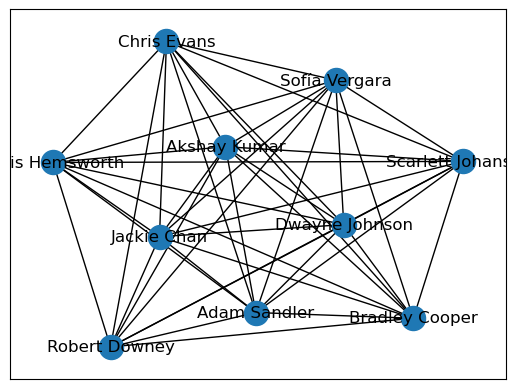

In [73]:
# Drawing a simple graph

G = nx.Graph()
    
G.add_nodes_from(list_of_nodes)
G.add_edges_from(list_of_edges)    
    
print(G)
nx.draw_networkx(G, with_labels=True)

### 4.3. Drawing customized graph

    Our simple graph is not very nice yet. Let's try to make it more readable.
    First of all, we should make the picture bigger. Also we should make a different colors for each distance. 
    And we should create labels for edges.
    Now let's plot our graph:

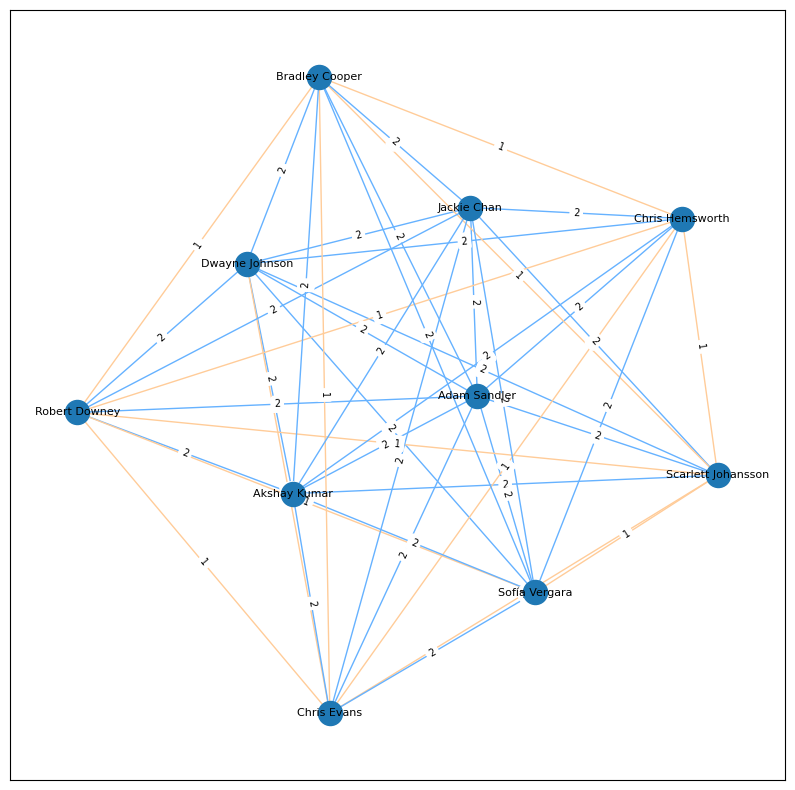

In [55]:
# Defining our variables

edge_labels = {}
colors = []
list_of_edges = []

# Making labels for edges distances in DataFrame
for i in range(len(df_distances)):
    edge_labels[(df_distances.iloc[i][0], df_distances.iloc[i][1])] = df_distances.iloc[i][2]

# Making a list of edges
for i in range(len(df_distances)):
    if (df_distances.iloc[i, 1], df_distances.iloc[i, 0], {'weight': df_distances.iloc[i, 2]}) not in list_of_edges:
        list_of_edges.append((df_distances.iloc[i, 0], df_distances.iloc[i, 1], {'weight': df_distances.iloc[i, 2]}))

# Creating a graph and fill it with nodes and labels        
G = nx.Graph()
G.add_nodes_from(list_of_nodes)
G.add_edges_from(list_of_edges)           

# Now we need to create colors for edges
# We will take an edges from list of edges to follow the correct order
edg_list = G.edges()
for i in list(edg_list):
    (actor_1, actor_2) = i
    for j in range(len(df_distances)):
        
        # For each distance we assign each color
        if df_distances[0][j] == actor_1 and df_distances[1][j] == actor_2:
            if df_distances[2][j] == 1:
                colors.append('#FFCC99')
            elif df_distances[2][j] == 2:
                colors.append('#66B2FF')

# Drawing the graph
fig = plt.subplots(figsize=(10, 10))
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.show()

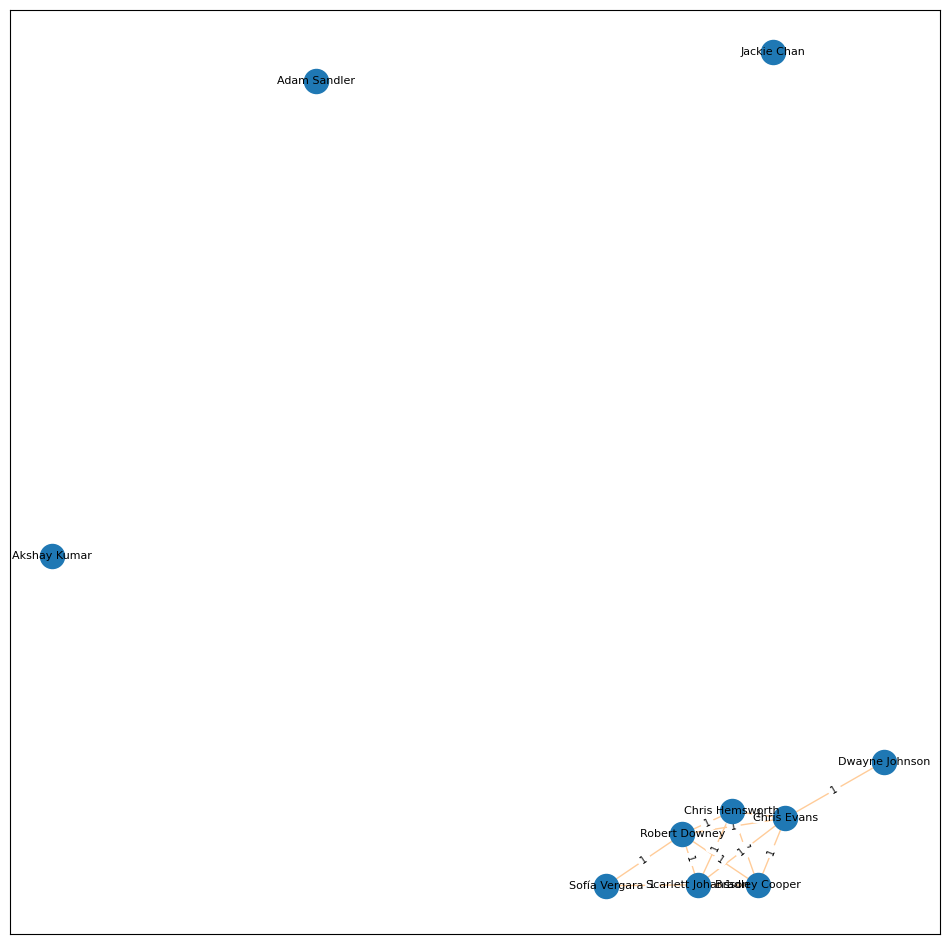

In [78]:
# Defining our variables

edge_labels = {}
colors = []
list_of_edges = []

# Making labels for edges distances in DataFrame
for i in range(len(df_distances)):
    if df_distances.iloc[i][2] == 1:
        edge_labels[(df_distances.iloc[i][0], df_distances.iloc[i][1])] = df_distances.iloc[i][2]

# Making a list of edges
for i in range(len(df_distances)):
    if (df_distances.iloc[i, 1], df_distances.iloc[i, 0], {'weight': df_distances.iloc[i, 2]}) not in list_of_edges:
        if df_distances.iloc[i][2] == 1:
            list_of_edges.append((df_distances.iloc[i, 0], df_distances.iloc[i, 1], {'weight': df_distances.iloc[i, 2]}))

# Creating a graph and fill it with nodes and labels        
G = nx.Graph()
G.add_nodes_from(list_of_nodes)
G.add_edges_from(list_of_edges)           

# Now we need to create colors for edges
# We will take an edges from list of edges to follow the correct order
edg_list = G.edges()
for i in list(edg_list):
    (actor_1, actor_2) = i
    for j in range(len(df_distances)):
        
        # For each distance we assign each color
        if df_distances[0][j] == actor_1 and df_distances[1][j] == actor_2:
            if df_distances[2][j] == 1:
                colors.append('#FFCC99')
            elif df_distances[2][j] == 2:
                colors.append('#66B2FF')

# Drawing the graph
fig = plt.subplots(figsize=(12, 12))
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.show()

    Let's try to delete nodes without edges for better readability:

In [86]:
list_of_nodes = set()

df_distances_1 = df_distances[df_distances[2] == 1]
list_of_nodes_1 = set([df_distances_1.iloc[i, 0] for i in range(len(df_distances_1))])
list_of_nodes_1

{'Bradley Cooper',
 'Chris Evans',
 'Chris Hemsworth',
 'Dwayne Johnson',
 'Robert Downey',
 'Scarlett Johansson',
 'Sofía Vergara'}

    And draw our graph again

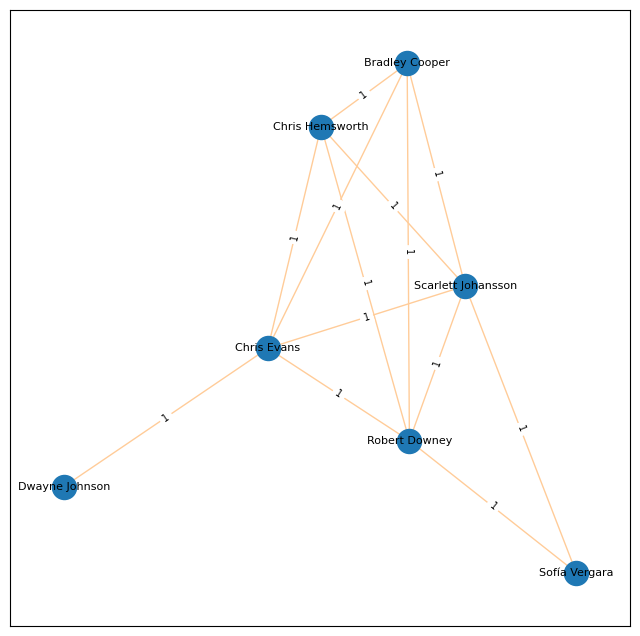

In [89]:
# Defining our variables

edge_labels = {}
colors = []
list_of_edges = []

# Making labels for edges distances in DataFrame
for i in range(len(df_distances)):
    if df_distances.iloc[i][2] == 1:
        edge_labels[(df_distances.iloc[i][0], df_distances.iloc[i][1])] = df_distances.iloc[i][2]

# Making a list of edges
for i in range(len(df_distances)):
    if (df_distances.iloc[i, 1], df_distances.iloc[i, 0], {'weight': df_distances.iloc[i, 2]}) not in list_of_edges:
        if df_distances.iloc[i][2] == 1:
            list_of_edges.append((df_distances.iloc[i, 0], df_distances.iloc[i, 1], {'weight': df_distances.iloc[i, 2]}))

# Creating a graph and fill it with nodes and labels        
G = nx.Graph()
G.add_nodes_from(list_of_nodes_1)
G.add_edges_from(list_of_edges)           

# Now we need to create colors for edges
# We will take an edges from list of edges to follow the correct order
edg_list = G.edges()
for i in list(edg_list):
    (actor_1, actor_2) = i
    for j in range(len(df_distances)):
        
        # For each distance we assign each color
        if df_distances[0][j] == actor_1 and df_distances[1][j] == actor_2:
            if df_distances[2][j] == 1:
                colors.append('#FFCC99')
            elif df_distances[2][j] == 2:
                colors.append('#66B2FF')

# Drawing the graph
fig = plt.subplots(figsize=(8, 8))
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.show()

    Now let's do it for other distances

In [91]:
list_of_nodes = set()

df_distances_2 = df_distances[df_distances[2] == 2]
list_of_nodes_2 = set([df_distances_2.iloc[i, 0] for i in range(len(df_distances_2))])
list_of_nodes_2

{'Adam Sandler',
 'Akshay Kumar',
 'Bradley Cooper',
 'Chris Evans',
 'Chris Hemsworth',
 'Dwayne Johnson',
 'Jackie Chan',
 'Robert Downey',
 'Scarlett Johansson',
 'Sofía Vergara'}

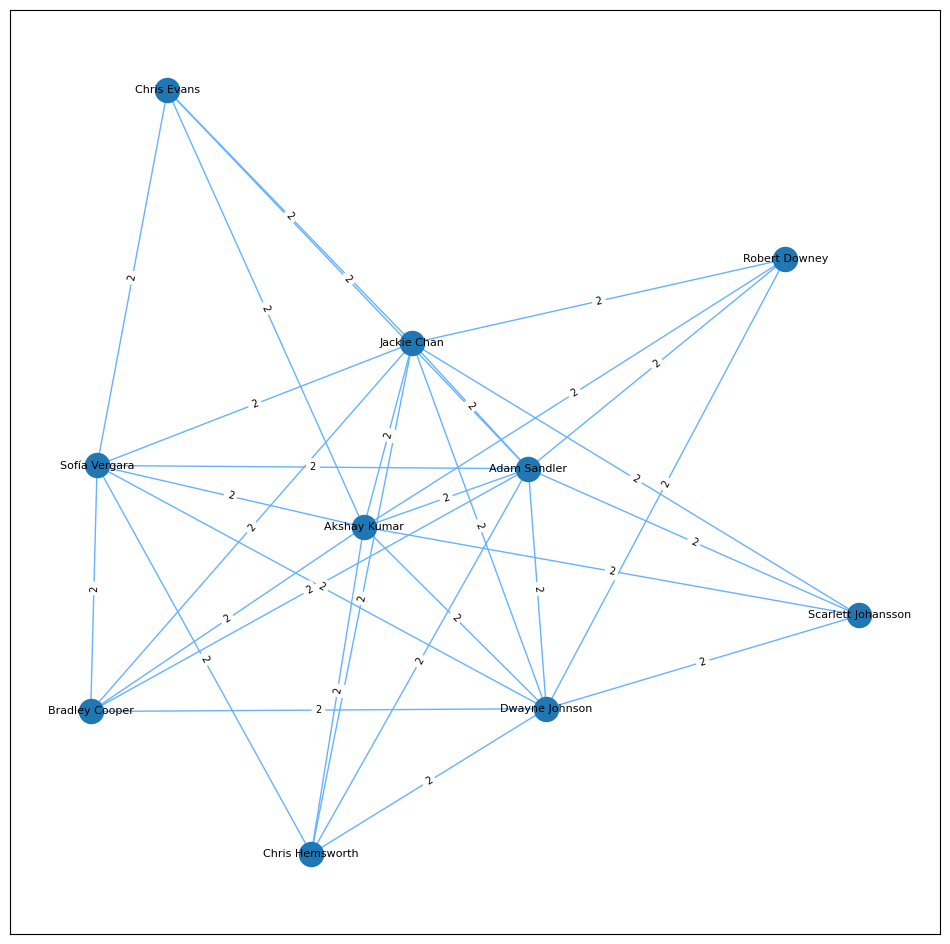

In [114]:
# Defining our variables

edge_labels = {}
colors = []
list_of_edges = []

# Making labels for edges distances in DataFrame
for i in range(len(df_distances)):
    if df_distances.iloc[i][2] == 2:
        edge_labels[(df_distances.iloc[i][0], df_distances.iloc[i][1])] = df_distances.iloc[i][2]

# Making a list of edges
for i in range(len(df_distances)):
    if (df_distances.iloc[i, 1], df_distances.iloc[i, 0], {'weight': df_distances.iloc[i, 2]}) not in list_of_edges:
        if df_distances.iloc[i][2] == 2:
            list_of_edges.append((df_distances.iloc[i, 0], df_distances.iloc[i, 1], {'weight': df_distances.iloc[i, 2]}))

# Creating a graph and fill it with nodes and labels        
G = nx.Graph()
G.add_nodes_from(list_of_nodes_2)
G.add_edges_from(list_of_edges)           

# Now we need to create colors for edges
# We will take an edges from list of edges to follow the correct order
edg_list = G.edges()
for i in list(edg_list):
    (actor_1, actor_2) = i
    for j in range(len(df_distances)):
        
        # For each distance we assign each color
        if df_distances[0][j] == actor_1 and df_distances[1][j] == actor_2:
            if df_distances[2][j] == 1:
                colors.append('#FFCC99')
            elif df_distances[2][j] == 2:
                colors.append('#66B2FF')

# Drawing the graph
fig = plt.subplots(figsize=(12, 12))
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.show()